In [1]:
import datetime

import numpy as np
import pandas as pd

from scipy.io import mmread

import matplotlib.pyplot as plt

In [2]:
import os
os.__file__

'/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/os.py'

# load data

## expression data

In [3]:
exp_data=mmread('data/koh_extract/koh.data.counts.mm').toarray().astype(float)
with open('data/koh_extract/koh.data.col','r') as f: exp_data_col=[i.strip().strip('"') for i in f.read().split()]
with open('data/koh_extract/koh.data.row','r') as f: exp_data_row=[i.strip().strip('"') for i in f.read().split()]
assert exp_data.shape==(len(exp_data_row),len(exp_data_col))

In [4]:
assert len(set(exp_data_row))==len(exp_data_row)
assert len(set(exp_data_col))==len(exp_data_col)

In [5]:
exp_data,exp_data.shape

(array([[1.93134327e+04, 5.81785206e+04, 9.08678570e+03, ...,
         7.58501657e+04, 8.94289538e+04, 1.01937411e+05],
        [2.48547207e+04, 4.67361235e+04, 1.09620933e+04, ...,
         1.85699498e+04, 1.85806217e+04, 2.49668288e+04],
        [1.18570138e+04, 2.80836990e+04, 6.80287185e+03, ...,
         3.53701816e+04, 5.75775170e+04, 5.59807979e+04],
        ...,
        [4.83851544e+01, 1.19916350e+01, 6.96361343e+00, ...,
         4.88990717e+00, 8.49751588e+00, 7.80405857e+01],
        [2.35818377e+01, 4.26839000e+01, 1.80639917e+01, ...,
         7.54470439e+00, 2.84437127e+00, 8.88332407e+00],
        [6.10992450e+01, 2.59814157e+01, 2.45930809e+01, ...,
         4.85579286e-01, 0.00000000e+00, 0.00000000e+00]]), (4898, 446))

In [6]:
exp_data_row[:5],exp_data_col[:5]

(['ENSG00000198804',
  'ENSG00000210082',
  'ENSG00000198712',
  'ENSG00000198938',
  'ENSG00000198727'],
 ['SRR3952323', 'SRR3952325', 'SRR3952326', 'SRR3952327', 'SRR3952328'])

## cluster info 

In [7]:
exp_data_meta=pd.read_csv('data/koh_extract/koh.metadata.tsv',sep='\t')
exp_data_meta.head()

,Run,LibraryName,phenoid,libsize.drop,feature.drop,total_features,log10_total_features,total_counts,log10_total_counts,pct_counts_top_50_features,pct_counts_top_100_features,pct_counts_top_200_features,pct_counts_top_500_features,is_cell_control,celltype,tSNE_1,tSNE_2
SRR3952323,SRR3952323,H7hESC,H7hESC,False,False,4895,3.689841,2.248411e+06,6.351876,18.278965,25.975390,35.537616,52.410941,False,hESC,9.973465,19.045918
SRR3952325,SRR3952325,H7hESC,H7hESC,False,False,4887,3.689131,2.271617e+06,6.356335,24.672529,32.222803,41.547358,57.969233,False,hESC,10.366232,21.511833
SRR3952326,SRR3952326,H7hESC,H7hESC,False,False,4888,3.689220,5.846824e+05,5.766921,22.732839,30.205988,39.431308,55.285817,False,hESC,9.881356,19.317197
SRR3952327,SRR3952327,H7hESC,H7hESC,False,False,4879,3.688420,3.191810e+06,6.504037,20.867378,29.003904,38.785558,56.020859,False,hESC,8.483966,21.289459
SRR3952328,SRR3952328,H7hESC,H7hESC,False,False,4873,3.687886,2.190385e+06,6.340521,21.287923,29.423689,39.307683,56.640975,False,hESC,9.017168,20.637262


`clusterid_to_clustername` is used to convert integers in `res.0.8` to cell-type name

# Panglao

In [8]:
markers_db=pd.read_csv("data/PanglaoDB_markers_27_Mar_2020.tsv.gz",sep='\t')
markers_db=markers_db[markers_db['species'].str.contains('Hs')].drop(columns='species')
markers_db.head()

,official gene symbol,cell type,nicknames,ubiquitousness index,product description,gene type,canonical marker,germ layer,organ,sensitivity_human,sensitivity_mouse,specificity_human,specificity_mouse
0,CTRB1,Acinar cells,CTRB,0.017,chymotrypsinogen B1,protein-coding gene,1.0,Endoderm,Pancreas,1.000000,0.957143,0.000629,0.015920
1,KLK1,Acinar cells,Klk6,0.013,kallikrein 1,protein-coding gene,1.0,Endoderm,Pancreas,0.833333,0.314286,0.005031,0.012826
2,RBPJL,Acinar cells,RBP-L|SUHL|RBPSUHL,0.001,recombination signal binding protein for immun...,protein-coding gene,1.0,Endoderm,Pancreas,0.000000,0.000000,0.000000,0.000000
3,PTF1A,Acinar cells,PTF1-p48|bHLHa29,0.001,pancreas associated transcription factor 1a,protein-coding gene,1.0,Endoderm,Pancreas,0.000000,0.157143,0.000629,0.000773
5,CELA3A,Acinar cells,ELA3|ELA3A,0.001,chymotrypsin like elastase family member 3A,protein-coding gene,1.0,Endoderm,Pancreas,0.833333,0.128571,0.000000,0.000000


In [9]:
#markers_db[(markers_db['official gene symbol']=='FXDY2') |(markers_db['nicknames'].str.contains('FXDY2'))],'FXDY2' in exp_data_row

## Marker info

In [10]:
clustername_to_markers=pd.read_csv('data/koh_extract/koh.rho.tsv',sep='\t').T

In [11]:
clustername_to_markers

,ENSG00000008311,ENSG00000018625,ENSG00000019549,ENSG00000026025,ENSG00000039068,ENSG00000042493,ENSG00000053438,ENSG00000075340,ENSG00000079102,ENSG00000092068,...,ENSG00000240563,ENSG00000241186,ENSG00000243004,ENSG00000249532,ENSG00000250305,ENSG00000254277,ENSG00000254339,ENSG00000260342,ENSG00000260834,ENSG00000280623
hESC,1,1,0,0,1,1,0,1,1,1,...,1,1,1,1,0,1,1,1,1,0
APS,0,0,1,0,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,0
MPS,0,0,1,0,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
DLL1pPXM,0,1,1,1,1,1,0,1,0,1,...,0,0,1,0,1,0,0,1,1,0
ESMT,0,1,1,1,1,1,1,1,1,1,...,0,0,1,0,1,0,0,1,1,0
Sclrtm,0,1,1,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
D5CntrlDrmmtm,0,1,1,1,0,1,0,1,1,1,...,0,0,0,0,1,0,0,1,1,0
D2LtM,0,1,1,1,1,1,0,1,1,1,...,0,0,1,0,1,0,0,1,1,0


In [12]:
len(clustername_to_markers.loc[['Sclrtm','D5CntrlDrmmtm']].T.iloc[:,1][clustername_to_markers.loc[['Sclrtm','D5CntrlDrmmtm']].T.iloc[:,1]==1].index.intersection(
    clustername_to_markers.loc[['Sclrtm','D5CntrlDrmmtm']].T.iloc[:,0][clustername_to_markers.loc[['Sclrtm','D5CntrlDrmmtm']].T.iloc[:,0]==1].index
)),len(clustername_to_markers.loc[['Sclrtm','D5CntrlDrmmtm']].T.iloc[:,1][clustername_to_markers.loc[['Sclrtm','D5CntrlDrmmtm']].T.iloc[:,1]==1].index)

(27, 50)

In [13]:
clustername_unique=list(clustername_to_markers.index)
exp_data_meta_clusterid_clusteridunique=exp_data_meta['celltype'].apply(lambda x: clustername_unique.index(x))

In [14]:
marker_unique=list(clustername_to_markers.columns)
marker_unique_exp_data_idx=[exp_data_row.index(marker) for marker in marker_unique]

In [15]:
pi_true=np.array([np.sum(exp_data_meta_clusterid_clusteridunique==i) for i in sorted(np.unique(exp_data_meta_clusterid_clusteridunique))])/exp_data_meta_clusterid_clusteridunique.shape[0]
M_true=np.array([np.mean(exp_data[marker_unique_exp_data_idx,:][:,exp_data_meta_clusterid_clusteridunique==i],axis=1) for i in sorted(np.unique(exp_data_meta_clusterid_clusteridunique))])

In [16]:
cell_size_factor=pd.read_csv('data/analysis/koh.size_factor_cluster.tsv',sep='\t',header=None)[0].values.astype(float)#.reshape(-1,1)
#cell_size_factor=np.ones_like(cell_size_factor)
cell_size_factor.shape

(446,)

In [17]:
Y=exp_data[marker_unique_exp_data_idx].transpose().astype(float)
Y.shape

(446, 84)

In [18]:
#marker_onehot=np.array([np.sum(np.eye(len(marker_unique))[[marker_unique.tolist().index(marker) for marker in value]],axis=0) for key,value in clustername_to_markers.items()])
#marker_onehot.shape
#marker_onehot.T
marker_onehot=clustername_to_markers

In [19]:
#exp_data_col_patient=pd.Series(exp_data_col).str.slice(start=1,stop=2).astype(int).values
#x_data_covariate=np.eye(len(np.unique(exp_data_col_patient)))[exp_data_col_patient-1]
x_data_intercept=np.array([np.ones(Y.shape[0])]).transpose()
x_data_null=np.concatenate([x_data_intercept],axis=1)
x_data_null.shape

(446, 1)

In [20]:
# Asuume that the following variables are initialized

# Input
Y
s=cell_size_factor
#X=x_data_null.copy()[:,[0, 1,2,3,4]]
#X=x_data_null.copy()[:,[0, 1,2]]
#X=x_data_null.copy()[:,[0,1,2,3]]
X=x_data_null.copy()#[:,[0,1,2]]
# 234 x
# 34 x
# 123 x
rho=marker_onehot

delta_min=2
B=10
LR=1e-1

# Optional
EM_ITER_MAX=20
M_ITER_MAX=10000

BATCH_SIZE=Y.shape[0]
NUM_WORKERS=0

LOWER_BOUND=1e-10
THETA_LOWER_BOUND=1e-20


Q_diff_tolerance=1e-4
LL_diff_tolerance=1e-4
X.shape

(446, 1)

In [21]:
import math
import numpy as np

import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
from torch.nn.parameter import Parameter

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [22]:
torch.set_default_dtype(torch.float64) 

In [23]:
device_cpu=torch.device("cpu")
device_cuda_list=[torch.device("cuda:{}".format(i)) for i in range(6)][::-1]

In [24]:
#from basic_tools import Cell_Dataset,Masked
class Masked_Function(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input, mask):
        #print('aaaa')
        output=input
        ctx.save_for_backward(input, mask)
        return output

    @staticmethod
    def backward(ctx, grad_output):
        input, mask = ctx.saved_tensors
        grad_input = grad_mask = None
        if ctx.needs_input_grad[0]:
            grad_input = grad_output.mul(mask)

        return grad_input, grad_mask
    
class Masked(nn.Module):    
    def __init__(self, mask):    
        super(Masked, self).__init__()
        
        self.mask = nn.Parameter(torch.Tensor(mask)==1, requires_grad=False)    
        
        
    def forward(self, input):
        return Masked_Function.apply(input, self.mask)

    def extra_repr(self):
        return 'mask={}'.format(self.mask.shape)  

In [25]:
import math
class NB_logprob(nn.Module):
    def __init__(self):
        super(NB_logprob,self).__init__()
        
    def forward(self,total_count,probs,value):
        
        #eps = torch.finfo(probs.dtype).eps
        #probs_clamped=probs.clamp(min=eps, max=1 - eps)        
        probs_clamped=probs
        logits=torch.log(probs_clamped) - torch.log1p(-probs_clamped)
        #logits=torch.log(probs_clamped)
        
        log_unnormalized_prob = (total_count * F.logsigmoid(-logits) +
                                 value * F.logsigmoid(logits))
        log_normalization = (-torch.lgamma(total_count + value) + torch.lgamma(1. + value) +
                             torch.lgamma(total_count))

        return log_unnormalized_prob - log_normalization
    
class Normal_logprob(nn.Module):
    def __init__(self):
        super(Normal_logprob,self).__init__()
        
    def forward(self,loc,scale,value):
    
        var = (scale ** 2)
        log_scale = torch.log(scale)
        
        
        #print(loc.shape,scale.shape,value.shape)
        return -((value - loc) ** 2) / (2 * var) - log_scale - math.log(math.sqrt(2 * math.pi))    
        #return log_scale
        
class Poisson_logprob(nn.Module):
    def __init__(self):
        super(Poisson_logprob,self).__init__()
        
    def forward(self,rate,value):
        #rate=rate.clamp(min=1e-3)+(-1)/rate.clamp(max=-1e-5)
        
        return (rate.log() * value) - rate - (value + 1).lgamma()
    
class Dirichlet_logprob(nn.Module):
    def __init__(self):
        super(Dirichlet_logprob,self).__init__()
        
    def forward(self,concentration,value):
        
        return ((torch.log(value) * (concentration - 1.0)).sum(-1) +
                torch.lgamma(concentration.sum(-1)) -
                torch.lgamma(concentration).sum(-1))
    
        
NB_logprob=NB_logprob()        
normal_logprob=Normal_logprob()
poisson_logprob=Poisson_logprob()
dirichlet_logprob=Dirichlet_logprob()

In [26]:
class Cell_Dataset(Dataset):
    def __init__(self,Y,X,s):
        self.Y=Y
        self.X=X
        self.s=s
        
    def __len__(self):
        return self.Y.shape[0]
    
    def __getitem__(self,idx):
        item= {"Y":self.Y[idx,:],"X":self.X[idx,:],"s":self.s[idx]}
        return item  

In [27]:
def run_EM(model,optimizer):
    global gamma_new,Q_new,LL_new
    
    print('Start time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    
    with torch.no_grad():
        for batch_idx,batch in enumerate(cell_dataloader):
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)
        gamma_new=Poisson_Function_Nomask.apply(batch_Y,batch_X,batch_s,model.delta_log,model.beta,'gamma')
        gamma_fixed,_,LL_old=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='LL')
        _,Q_old,_=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_fixed,mode='M')

    print(LL_old)
    print(Q_old)

    for em_idx in range(EM_ITER_MAX):#
        #optimizer = optim.Adam(model.parameters(),lr=0.1,eps=1e-3,betas=(0.9,0.999))
        LL_new=torch.zeros_like(LL_old)
        #optimizer = optim.Adam(model.parameters(),lr=LR)
        for batch_idx,batch in enumerate(cell_dataloader):
            # It is usually just one iteration(batch).
            # However, developer of cellAssign may have done this for extreme situation of larse sample size
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)

            #############
            #E-step
            ######### ####
            with torch.no_grad():
                gamma_new,_,_=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='E')

            #############
            #M-step
            #############
            for m_idx in range(M_ITER_MAX):#
            #for m_idx in range(20):#    
                optimizer.zero_grad()
                _,Q_new,_=model(batch_Y,batch_X,batch_s,gamma_fixed=gamma_new,mode='M')
                Q_new.backward()
                optimizer.step()
                
                #Constraint
                model.delta_log.data=model.delta_log.data.clamp(min=model.delta_log_min)
                #model.NB_basis_a.data=model.NB_basis_a.data.clamp(min=0)

                if m_idx%20==0:
                    #print(sorted(model.delta_log.cpu().detach().numpy().flatten())[-10:])
                    Q_diff=(Q_old-Q_new)/torch.abs(Q_old)
                    Q_old=Q_new
                    print('M: {}, Q: {} Q_diff: {}'.format(m_idx,Q_new,Q_diff))    
                    if m_idx>0 and torch.abs(Q_diff)<Q_diff_tolerance:
                        print('M break')
                        break                
            #############
            #Look at LL
            #############
            with torch.no_grad():
                _,_,LL_temp=model(batch_Y,batch_X,batch_s,gamma_fixed=None,mode='LL')
                LL_new+=LL_temp

        LL_diff=(LL_new-LL_old)/torch.abs(LL_old)
        LL_old=LL_new
        print('EM: {}, LL: {} LL_diff: {}'.format(em_idx,LL_new,LL_diff))
        if LL_diff<LL_diff_tolerance:
            print('EM break')
            break
    print('End time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))    
    return gamma_new,Q_new,LL_new

In [295]:
def run_EM_trick(model,optimizer,LL_diff_tolerance,Q_diff_tolerance,verbose=True):
    global gamma_new,LL_new
    
    if verbose:
        print('Start time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    
    with torch.no_grad():
        for batch_idx,batch in enumerate(cell_dataloader):
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)    
        LL_old=model(batch_Y,batch_X,batch_s)
        Q_old=LL_old
    if verbose:
        print(LL_old)

    for em_idx in range(EM_ITER_MAX):#
        #optimizer = optim.Adam(model.parameters(),lr=0.1,eps=1e-3,betas=(0.9,0.999))
        LL_new=torch.zeros_like(LL_old)
        #optimizer = optim.Adam(model.parameters(),lr=LR)
        for batch_idx,batch in enumerate(cell_dataloader):
            # It is usually just one iteration(batch).
            # However, developer of cellAssign may have done this for extreme situation of larse sample size
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)

            #############
            #M-step
            #############
            for m_idx in range(M_ITER_MAX):#
            #for m_idx in range(20):#    
                optimizer.zero_grad()
                Q_new=-model(batch_Y,batch_X,batch_s)
                Q_new.backward()
                optimizer.step()
                
                #Constraint
                model.delta_log.data=model.delta_log.data.clamp(min=model.delta_log_min)
                #model.NB_basis_a.data=model.NB_basis_a.data.clamp(min=0)

                if m_idx%20==0:
                    #print(sorted(model.delta_log.cpu().detach().numpy().flatten())[-10:])
                    Q_diff=(Q_old-Q_new)/torch.abs(Q_old)
                    Q_old=Q_new
                    if verbose:
                        print('M: {}, Q: {} Q_diff: {}'.format(m_idx,Q_new,Q_diff))    
                    if m_idx>0 and torch.abs(Q_diff)<(Q_diff_tolerance):
                        if verbose:
                            print('M break')
                        break                
            #############
            #Look at LL
            #############
            with torch.no_grad():
                LL_temp=-Q_new
                LL_new+=LL_temp

        LL_diff=(LL_new-LL_old)/torch.abs(LL_old)
        LL_old=LL_new
        if verbose:
            print('EM: {}, LL: {} LL_diff: {}'.format(em_idx,LL_new,LL_diff))
        if LL_diff<LL_diff_tolerance:
            if verbose:
                print('EM break')
            break
    if verbose:
        print('End time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))    
    
    with torch.no_grad():
        gamma_new=Poisson_Function.apply(batch_Y,batch_X,batch_s,model.delta_log,model.beta,model.masked.mask,'gamma')
    return gamma_new,Q_new,LL_new

In [663]:
def run_quasi_trick(model,optimizer,LL_diff_tolerance,Q_diff_tolerance,verbose=True):
    global gamma_new,LL_new
    
    if verbose:
        print('Start time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    
    with torch.no_grad():
        for batch_idx,batch in enumerate(cell_dataloader):
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)    
        LL_old=model(batch_Y,batch_X,batch_s)
        Q_old=LL_old
    if verbose:
        print(LL_old)
        
        
    def closure():
        global Q_new
        optimizer.zero_grad()
        Q_new = -model(batch_Y,batch_X,batch_s)
        Q_new.backward()
        print(Q_new)
        return Q_new
    

    for em_idx in range(EM_ITER_MAX):#
        #optimizer = optim.Adam(model.parameters(),lr=0.1,eps=1e-3,betas=(0.9,0.999))
        LL_new=torch.zeros_like(LL_old)
        #optimizer = optim.Adam(model.parameters(),lr=LR)
        for batch_idx,batch in enumerate(cell_dataloader):
            # It is usually just one iteration(batch).
            # However, developer of cellAssign may have done this for extreme situation of larse sample size
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)

            #############
            #M-step
            #############
            for m_idx in range(M_ITER_MAX):#
            #for m_idx in range(20):#    
                optimizer.zero_grad()
                optimizer.step(closure)
                
                #Constraint
                model.delta_log.data=model.delta_log.data.clamp(min=model.delta_log_min)
                #model.NB_basis_a.data=model.NB_basis_a.data.clamp(min=0)

                if m_idx%20==0:
                    #print(sorted(model.delta_log.cpu().detach().numpy().flatten())[-10:])
                    Q_diff=(Q_old-Q_new)/torch.abs(Q_old)
                    Q_old=Q_new
                    if verbose:
                        print('M: {}, Q: {} Q_diff: {}'.format(m_idx,Q_new,Q_diff))    
                    if m_idx>0 and torch.abs(Q_diff)<(Q_diff_tolerance):
                        if verbose:
                            print('M break')
                        break                
            #############
            #Look at LL
            #############
            with torch.no_grad():
                LL_temp=-Q_new
                LL_new+=LL_temp

        LL_diff=(LL_new-LL_old)/torch.abs(LL_old)
        LL_old=LL_new
        if verbose:
            print('EM: {}, LL: {} LL_diff: {}'.format(em_idx,LL_new,LL_diff))
        if LL_diff<LL_diff_tolerance:
            if verbose:
                print('EM break')
            break
    if verbose:
        print('End time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))    
    
    with torch.no_grad():
        gamma_new=Poisson_Function.apply(batch_Y,batch_X,batch_s,model.delta_log,model.beta,model.masked.mask,'gamma')
    return gamma_new,Q_new,LL_new



"""
def run_quasi_trick(model,optimizer):
    global gamma_new,LL_new
    
    print('Start time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    
    with torch.no_grad():
        for batch_idx,batch in enumerate(cell_dataloader):
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)    
        LL_old=model(batch_Y,batch_X,batch_s)
        Q_old=LL_old
    print(LL_old)


    
    
    for em_idx in range(EM_ITER_MAX):#
        #optimizer = optim.Adam(model.parameters(),lr=0.1,eps=1e-3,betas=(0.9,0.999))
        LL_new=torch.zeros_like(LL_old)
        #optimizer = optim.Adam(model.parameters(),lr=LR)
        for batch_idx,batch in enumerate(cell_dataloader):
            # It is usually just one iteration(batch).
            # However, developer of cellAssign may have done this for extreme situation of larse sample size
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)

            #############
            #M-step
            #############
            
            
            for m_idx in range(M_ITER_MAX):#
            #for m_idx in range(20):#    
         
                optimizer.step(closure)
                
                #Constraint
                model.delta_log.data=model.delta_log.data.clamp(min=model.delta_log_min)
                #model.NB_basis_a.data=model.NB_basis_a.data.clamp(min=0)
                
                #with torch.no_grad():
                #    Q=Poisson_Function.apply(batch_Y,batch_X,batch_s,model.delta_log,model.beta,model.masked.mask,'LL')
                #    gamma_new=Poisson_Function.apply(batch_Y,batch_X,batch_s,model.delta_log,model.beta,model.masked.mask,'gamma')
                #print(Q,gamma_new[:3])                   


                if m_idx%20==0:
                    #print(sorted(model.delta_log.cpu().detach().numpy().flatten())[-10:])
                    Q_diff=(Q_old-Q_new)/torch.abs(Q_old)
                    Q_old=Q_new
                    print('M: {}, Q: {} Q_diff: {}'.format(m_idx,Q_new,Q_diff))    
                    if m_idx>0 and torch.abs(Q_diff)<(Q_diff_tolerance):
                        print('M break')
                        break                
            #############
            #Look at LL
            #############
            with torch.no_grad():
                LL_temp=-Q_new
                LL_new+=LL_temp

        LL_diff=(LL_new-LL_old)/torch.abs(LL_old)
        LL_old=LL_new
        print('EM: {}, LL: {} LL_diff: {}'.format(em_idx,LL_new,LL_diff))
        if LL_diff<LL_diff_tolerance:
            print('EM break')
            break
    print('End time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))    
    
    with torch.no_grad():
        gamma_new=Poisson_Function.apply(batch_Y,batch_X,batch_s,model.delta_log,model.beta,model.masked.mask,'gamma')
    return gamma_new,Q_new,LL_new

"""

"\ndef run_quasi_trick(model,optimizer):\n    global gamma_new,LL_new\n    \n    print('Start time:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))\n    \n    with torch.no_grad():\n        for batch_idx,batch in enumerate(cell_dataloader):\n            batch_Y=batch['Y'].to(device)\n            batch_X=batch['X'].to(device)\n            batch_s=batch['s'].to(device)    \n        LL_old=model(batch_Y,batch_X,batch_s)\n        Q_old=LL_old\n    print(LL_old)\n\n\n    \n    \n    for em_idx in range(EM_ITER_MAX):#\n        #optimizer = optim.Adam(model.parameters(),lr=0.1,eps=1e-3,betas=(0.9,0.999))\n        LL_new=torch.zeros_like(LL_old)\n        #optimizer = optim.Adam(model.parameters(),lr=LR)\n        for batch_idx,batch in enumerate(cell_dataloader):\n            # It is usually just one iteration(batch).\n            # However, developer of cellAssign may have done this for extreme situation of larse sample size\n            batch_Y=batch['Y'].to(device)\n            batch

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.distributions.negative_binomial import NegativeBinomial
from torch.distributions.normal import Normal
from torch.distributions.dirichlet import Dirichlet

class Custom_Model(nn.Module):
    def __init__(self,Y,rho,X_col=5,delta_min=2,LOWER_BOUND=1e-10,THETA_LOWER_BOUND=1e-20):
        # Y,rho are needed for model parameter initialization
        super(Custom_Model, self).__init__()
        
        #rho
        self.masked=Masked(rho)
         
        #delta
        self.delta_log_min=np.log(delta_min) #
        self.delta_log=nn.Parameter(torch.Tensor(np.random.uniform(-2,2,size=rho.shape)),requires_grad=True) # (C,G)
        self.delta_log.data=self.delta_log.data.clamp(min=self.delta_log_min)
          
        
        #beta
        Y_colmean=np.mean(Y,axis=0)
        beta_init=np.hstack([((Y_colmean-Y_colmean.mean())/np.std(Y_colmean)).reshape(-1,1),\
                     np.zeros((Y.shape[1],X_col-1))]).T
        self.beta=nn.Parameter(torch.Tensor(beta_init),requires_grad=True) # (P,G)
        

        # lower bounds
        self.LOWER_BOUND=LOWER_BOUND
        self.THETA_LOWER_BOUND=THETA_LOWER_BOUND
        
    def forward(self,Y,X,s,gamma_fixed=None,mode='E'):
        delta_log_masked=self.masked(self.delta_log) #(C,G)
        delta=torch.exp(delta_log_masked)*self.masked.mask
        
        X_beta_s=X.matmul(self.beta)+torch.log(s.view(-1, 1)) #(N,P)*(P,G) + (N,1) = (N,G)
        
        mu_log=X_beta_s.unsqueeze(dim=1).repeat(1,delta.shape[0],1)+delta #(N,1,G)+(C,G) = (N,C,G)
        
        mu=torch.exp(mu_log) # (N,C,G)
        
        #Y_extend=Y.view(Y.shape[0],1,Y.shape[1]).repeat(1,mu_log.shape[1],1) # (N,C,G)
        Y_extend=Y.unsqueeze(dim=1).repeat(1,mu_log.shape[1],1)
        
        # Poisson
        Y_logprob=poisson_logprob(rate=mu,value=Y_extend) # (N,C,G)

        Y_logprob_reduce=torch.sum(Y_logprob,axis=2)
        
        Y_logprob_reduce_reduce=torch.logsumexp(Y_logprob_reduce,dim=1).view(-1,1) # (N,1)
        
        gamma=torch.exp(Y_logprob_reduce-Y_logprob_reduce_reduce) # (N,C)

        if mode=='E':
            return gamma,None,None
        elif mode=='M' or mode=='LL':
            if mode=='M':
                Q=-torch.sum(gamma_fixed*Y_logprob_reduce) # (N,C) (N,C)
                return gamma,Q,None
            elif mode=='LL':      
                LL=torch.sum(Y_logprob_reduce_reduce) # product of likelihood(y_i)-> (1) 
                return gamma,None,LL
        else:
            raise          

In [303]:
   
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.distributions.negative_binomial import NegativeBinomial
from torch.distributions.normal import Normal
from torch.distributions.dirichlet import Dirichlet


class Poisson_Function(torch.autograd.Function):
    @staticmethod
    def forward(ctx, Y, X, s, delta_log, beta, mask,to_return='LL'):

        with torch.no_grad():
            #mu=torch.exp((X.matmul(beta)+torch.log(s.view(-1, 1))).unsqueeze(dim=1).repeat(1,delta_log.shape[0],1)+torch.exp(delta_log))
            mu=torch.exp((X.matmul(beta)+torch.log(s.view(-1, 1))).unsqueeze(dim=1).repeat(1,delta_log.shape[0],1)+torch.exp(delta_log)*mask)
            Y_extend=Y.unsqueeze(dim=1).repeat(1,mu.shape[1],1)
            Y_logprob=poisson_logprob(rate=mu,value=Y_extend) # (N,C,G)
            Y_logprob_reduce=Y_logprob.sum(axis=2)
            
            Y_logprob_reduce_reduce=torch.logsumexp(Y_logprob_reduce,dim=1).view(-1,1)
            
            LL=torch.sum(Y_logprob_reduce_reduce)
            
            gamma=torch.exp(Y_logprob_reduce-Y_logprob_reduce_reduce)
            A=mu-Y.unsqueeze(dim=1)        
            
            #gradient
            grad_delta_log=(A*gamma.unsqueeze(dim=2)).sum(axis=0)
            grad_beta=(X.unsqueeze(dim=2)@gamma.unsqueeze(dim=1)@A).sum(axis=0)
        
            ctx.save_for_backward(grad_delta_log,grad_beta)
            
        if to_return=='LL':
            return LL
        else:
            return gamma
            

    @staticmethod
    def backward(ctx, grad_output):
        
        grad_Y = grad_X = grad_s = grad_delta_log = grad_beta = grad_mask=None
        grad_delta_log,grad_beta = ctx.saved_tensors

        return grad_Y, grad_X, grad_s, grad_delta_log, grad_beta, grad_mask

class Poisson_Function_Nomask(torch.autograd.Function):
    @staticmethod
    def forward(ctx, Y, X, s, delta_log, beta, to_return='LL'):

        with torch.no_grad():
            #mu=torch.exp((X.matmul(beta)+torch.log(s.view(-1, 1))).unsqueeze(dim=1).repeat(1,delta_log.shape[0],1)+torch.exp(delta_log))
            mu=torch.exp((X.matmul(beta)+torch.log(s.view(-1, 1))).unsqueeze(dim=1).repeat(1,delta_log.shape[0],1)+torch.exp(delta_log))
            Y_extend=Y.unsqueeze(dim=1).repeat(1,mu.shape[1],1)
            Y_logprob=poisson_logprob(rate=mu,value=Y_extend) # (N,C,G)
            Y_logprob_reduce=Y_logprob.sum(axis=2)
            
            Y_logprob_reduce_reduce=torch.logsumexp(Y_logprob_reduce,dim=1).view(-1,1)
            
            LL=torch.sum(Y_logprob_reduce_reduce)
            
            gamma=torch.exp(Y_logprob_reduce-Y_logprob_reduce_reduce)
            A=mu-Y.unsqueeze(dim=1)        
            
            #gradient
            grad_delta_log=(A*gamma.unsqueeze(dim=2)).sum(axis=0)
            grad_beta=(X.unsqueeze(dim=2)@gamma.unsqueeze(dim=1)@A).sum(axis=0)
        
            ctx.save_for_backward(grad_delta_log,grad_beta)
            
        if to_return=='LL':
            return LL
        else:
            return gamma
            

    @staticmethod
    def backward(ctx, grad_output):
        
        grad_Y = grad_X = grad_s = grad_delta_log = grad_beta = None
        grad_delta_log,grad_beta = ctx.saved_tensors

        return grad_Y, grad_X, grad_s, grad_delta_log, grad_beta

class Custom_Model_Trick(nn.Module):
    def __init__(self,Y,rho,X_col=5,delta_min=2,LOWER_BOUND=1e-10,THETA_LOWER_BOUND=1e-20):
        # Y,rho are needed for model parameter initialization
        super(Custom_Model_Trick, self).__init__()
        
        #rho
        self.masked=Masked(rho)
         
        #delta
        self.delta_log_min=np.log(delta_min) #
        self.delta_log=nn.Parameter(torch.Tensor(np.random.uniform(-2,2,size=rho.shape)),requires_grad=True) # (C,G)
        self.delta_log.data=self.delta_log.data.clamp(min=self.delta_log_min)
          
        #beta
        Y_colmean=np.mean(Y,axis=0)
        beta_init=np.hstack([((Y_colmean-Y_colmean.mean())/(np.std(Y_colmean) if len(Y_colmean)>1 else 1)).reshape(-1,1),\
                     np.zeros((Y.shape[1],X_col-1))]).T
        self.beta=nn.Parameter(torch.Tensor(beta_init),requires_grad=True) # (P,G)
        
        # lower bounds
        self.LOWER_BOUND=LOWER_BOUND
        self.THETA_LOWER_BOUND=THETA_LOWER_BOUND
        
    def init_parameter(self,rho=None,Y=None,delta_min=None):
        if delta_min is not None:
            self.delta_log_min=np.log(delta_min) #
            self.delta_log.data[:]=torch.Tensor(np.random.uniform(-2,2,size=self.delta_log.data.shape))
            self.delta_log.data=self.delta_log.data.clamp(min=self.delta_log_min)

        if rho is not None:
            self.masked.mask.data=(rho==1)
        
        if Y is not None:
            Y_colmean=np.mean(Y,axis=0)
            beta_init=np.hstack([((Y_colmean-Y_colmean.mean())/(np.std(Y_colmean) if len(Y_colmean)>1 else 1)).reshape(-1,1),\
                         np.zeros((Y.shape[1],X_col-1))]).T      
            self.beta.data[:]=torch.Tensor(beta_init)
        
    def forward(self,Y,X,s):
        delta_log_masked=self.masked(self.delta_log) #(C,G)
        #delta=torch.exp(delta_log_masked)*self.masked.mask
        
        LL=Poisson_Function.apply(Y,X,s,delta_log_masked,self.beta,self.masked.mask)

        return LL  
    
class Custom_Model_Trick_Nomask(nn.Module):
    def __init__(self,Y,rho,X_col=5,delta_min=2,LOWER_BOUND=1e-10,THETA_LOWER_BOUND=1e-20):
        # Y,rho are needed for model parameter initialization
        super(Custom_Model_Trick_Nomask, self).__init__()
         
        #delta
        self.delta_log_min=np.log(delta_min) #
        self.delta_log=nn.Parameter(torch.Tensor(np.random.uniform(-2,2,size=rho.shape)),requires_grad=True) # (C,G)
        self.delta_log.data=self.delta_log.data.clamp(min=self.delta_log_min)
          
        #beta
        Y_colmean=np.mean(Y,axis=0)
        beta_init=np.hstack([((Y_colmean-Y_colmean.mean())/np.std(Y_colmean)).reshape(-1,1),\
                     np.zeros((Y.shape[1],X_col-1))]).T
        self.beta=nn.Parameter(torch.Tensor(beta_init),requires_grad=True) # (P,G)
        
        # lower bounds
        self.LOWER_BOUND=LOWER_BOUND
        self.THETA_LOWER_BOUND=THETA_LOWER_BOUND
        
    def init_parameter(self,Y=None,delta_min=None):
        if delta_min is not None:
            self.delta_log_min=np.log(delta_min) #
            self.delta_log.data[:]=torch.Tensor(np.random.uniform(-2,2,size=self.delta_log.data.shape))
            self.delta_log.data=self.delta_log.data.clamp(min=self.delta_log_min)
        
        if Y is not None:
            Y_colmean=np.mean(Y,axis=0)
            beta_init=np.hstack([((Y_colmean-Y_colmean.mean())/np.std(Y_colmean)).reshape(-1,1),\
                         np.zeros((Y.shape[1],model.beta.shape[0]-1))]).T        
            self.beta.data[:]=torch.Tensor(beta_init)
        
    def forward(self,Y,X,s):
        
        LL=Poisson_Function_Nomask.apply(Y,X,s,self.delta_log,self.beta)

        return LL     

In [595]:
np.sum(np.array(result1_1)/np.array(result1_10)>40)

86

In [95]:
device=device_cuda_list[3]#

model=Custom_Model(Y,np.ones_like(rho.values).repeat(2,axis=0),X_col=X.shape[1],delta_min=0,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
optimizer = optim.Adam(model.parameters(),lr=LR)#,betas=(0.92, 0.999))


cell_dataset=Cell_Dataset(Y,X,s)
cell_dataloader=DataLoader(dataset=cell_dataset,shuffle=False,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


In [83]:
device=device_cuda_list[3]#

model=Custom_Model_Trick(Y,rho.values,X_col=X.shape[1],delta_min=delta_min,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
optimizer = optim.Adam(model.parameters(),lr=LR)#,betas=(0.92, 0.999))


cell_dataset=Cell_Dataset(Y,X,s)
cell_dataloader=DataLoader(dataset=cell_dataset,shuffle=False,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)

In [89]:
device=device_cuda_list[3]#

model=Custom_Model_Trick(Y,np.ones_like(rho.values),X_col=X.shape[1],delta_min=0,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
optimizer = optim.Adam(model.parameters(),lr=LR)#,betas=(0.92, 0.999))


cell_dataset=Cell_Dataset(Y,X,s)
cell_dataloader=DataLoader(dataset=cell_dataset,shuffle=False,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:95: RuntimeWarning: divide by zero encountered in log


In [97]:
device=device_cuda_list[3]#

model=Custom_Model_Trick(Y,np.ones_like(rho.values).repeat(2,axis=0),X_col=X.shape[1],delta_min=0,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
optimizer = optim.Adam(model.parameters(),lr=LR)#,betas=(0.92, 0.999))

cell_dataset=Cell_Dataset(Y,X,s)
cell_dataloader=DataLoader(dataset=cell_dataset,shuffle=False,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:95: RuntimeWarning: divide by zero encountered in log


In [175]:
#marker_unique_exp_data_idx
np.random.choice(marker_unique_exp_data_idx,size=10,replace=False)

array([ 378, 2932,  363, 1171, 4870, 3257, 4369, 1104, 2702, 1251])

In [213]:
#EM x
# 3428944 original 
# susceptible anchorx
# 310000 anchor x 2배
#run_EM_trick(model,optimizer, LL_diff_tolerance=1e-3*LL_diff_tolerance,Q_diff_tolerance=1e-3*Q_diff_tolerance)
len(Y_colmean)

array([1089.21032983])

In [216]:
xx=Y[:,0:5];X_col=X.shape[1]
Y_colmean=np.mean(xx,axis=0)
print(len(Y_colmean))
beta_init=np.hstack([((Y_colmean-Y_colmean.mean())).reshape(-1,1),\
             np.zeros((xx.shape[1],X_col-1))]).T

5


In [719]:
#Y=exp_data[np.random.choice(marker_unique_exp_data_idx,size=20,replace=False)].transpose().astype(float)
#Y.shape
#Y=exp_data[np.array(result1_1)/np.array(result1_10)>30].transpose().astype(float)
Y=exp_data[np.array(result1_1)/np.array(result1_10)>40].transpose().astype(float)
Y.shape



(446, 86)

In [672]:
device=device_cuda_list[3]#

model=Custom_Model_Trick(Y,np.ones((20,338)),X_col=X.shape[1],delta_min=0,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
optimizer = optim.LBFGS([i for i in model.parameters()][:-1],lr=LR)#,betas=(0.92, 0.999))

cell_dataset=Cell_Dataset(Y,X,s)
cell_dataloader=DataLoader(dataset=cell_dataset,shuffle=False,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:95: RuntimeWarning: divide by zero encountered in log


In [674]:
#run_quasi_trick(model,optimizer,LL_diff_tolerance=1e-3*LL_diff_tolerance,Q_diff_tolerance=1e-3*Q_diff_tolerance,verbose=True)

In [720]:
device=device_cuda_list[3]#

model=Custom_Model_Trick(Y,np.ones((15,86)),X_col=X.shape[1],delta_min=0,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
optimizer = optim.Adamax(model.parameters(),lr=LR)#,betas=(0.92, 0.999))

cell_dataset=Cell_Dataset(Y,X,s)
cell_dataloader=DataLoader(dataset=cell_dataset,shuffle=False,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:95: RuntimeWarning: divide by zero encountered in log


In [721]:
run_EM_trick(model,optimizer,LL_diff_tolerance=1e-3*LL_diff_tolerance,Q_diff_tolerance=1e-3*Q_diff_tolerance,verbose=True)

Start time: 2020-05-20 01:25:55
tensor(-47575492.2099, device='cuda:2')
M: 0, Q: 47575492.209865466 Q_diff: -2.0
M: 20, Q: 16431320.700630741 Q_diff: 0.6546263645965292
M: 40, Q: 8906477.00726255 Q_diff: 0.4579573261618184
M: 60, Q: 7495044.272260884 Q_diff: 0.15847261873025115
M: 80, Q: 7323223.56365578 Q_diff: 0.02292457554133624
M: 100, Q: 7298903.61044838 Q_diff: 0.003320935513712364
M: 120, Q: 7295467.210423917 Q_diff: 0.0004708104405631849
M: 140, Q: 7294618.835853644 Q_diff: 0.00011628790121360391
M: 160, Q: 7294282.166575531 Q_diff: 4.6153100756740655e-05
M: 180, Q: 7294071.980743836 Q_diff: 2.881514957811679e-05
M: 200, Q: 7293921.659706285 Q_diff: 2.0608658366314526e-05
M: 220, Q: 7293814.1027975 Q_diff: 1.4746101453151153e-05
M: 240, Q: 7293738.749924886 Q_diff: 1.033106568824071e-05
M: 260, Q: 7293685.237544248 Q_diff: 7.336755876910302e-06
M: 280, Q: 7293645.436897658 Q_diff: 5.456863751837698e-06
M: 300, Q: 7293614.302596727 Q_diff: 4.268688572784319e-06
M: 320, Q: 729358

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:2'),
 tensor(7293384.6849, device='cuda:2', grad_fn=<NegBackward>),
 tensor(-7293384.6849, device='cuda:2'))

(array([ 2,  3,  4,  5,  7,  8,  9, 10, 11, 12, 14]), array([ 9, 55,  5, 74, 83, 50, 55,  2, 51, 20, 42])) Parameter containing:
tensor([[ 1.2328,  0.4179,  1.1874,  ..., -0.4976,  0.5704,  2.5101],
        [-0.7496, -1.1168,  0.4719,  ...,  1.6721, -0.6909, -0.8269],
        [ 1.2309,  1.1542, -0.1984,  ...,  0.9859,  1.4348,  0.2735],
        ...,
        [ 1.1024,  1.5396,  1.2910,  ...,  1.4483,  1.1090,  1.1940],
        [ 0.0211,  1.1051,  0.7477,  ...,  1.7025,  1.4237, -0.0129],
        [ 0.7249,  0.9815,  1.7455,  ...,  1.3752,  1.5639,  1.3511]],
       device='cuda:2', requires_grad=True)


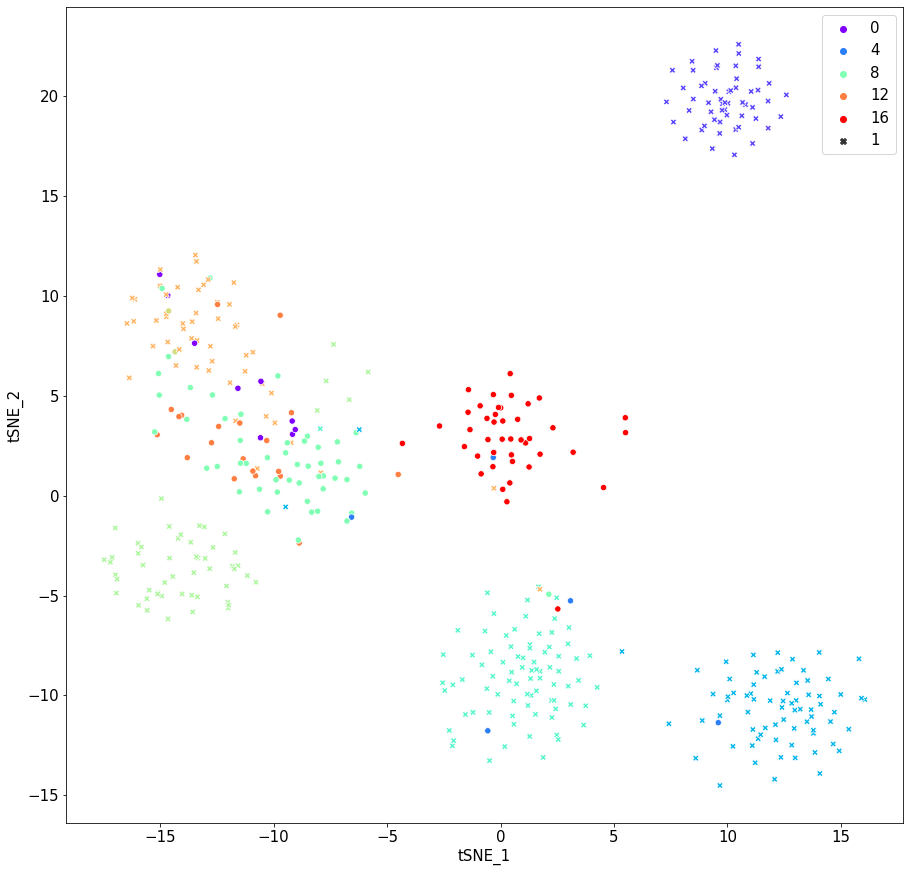

In [722]:
import seaborn as sns

with torch.no_grad():
    for batch_idx,batch in enumerate(cell_dataloader):
        batch_Y=batch['Y'].to(device)
        batch_X=batch['X'].to(device)
        batch_s=batch['s'].to(device)    
    gamma_new=Poisson_Function.apply(batch_Y,batch_X,batch_s,model.delta_log,model.beta,model.masked.mask,'gamma')

plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams["font.size"] = 15
plt.rcParams['font.family']='Arial'


plot_value=np.argmax(gamma_new.cpu().numpy(),axis=1)

sns.scatterplot(x="tSNE_1", y="tSNE_2",hue=plot_value,style=np.array((list(range(0,2))*30))[plot_value],
                data=exp_data_meta,s=40,palette=plt.cm.rainbow)#,linewidth=0.3)

print(np.unique(plot_value,return_counts=True),model.delta_log)

In [652]:
#
#pd.Series(np.max(model.delta_log.detach().cpu().numpy(),axis=0),index=np.arange(len(result1_1))[np.array(result1_1)/np.array(result1_10)>30]).loc[marker_unique_exp_data_idx].sort_values()
np.max(model.delta_log.detach().cpu().numpy(),axis=0)

array([1.7720149 , 1.10011604, 1.9025391 , 1.95219512, 1.09657972,
       1.90799904, 1.67655469, 1.78111208, 1.24826431, 1.50521938,
       1.9837319 , 1.55200484, 2.01371632, 1.87294748, 1.98209561,
       1.58149558, 1.51980493, 1.66279192, 2.01015915, 2.15716332,
       1.5749632 , 1.44947841, 1.91541617, 2.13347761, 2.05323308,
       1.94330837, 1.87203871, 2.13546495, 1.96044149, 1.68134755,
       1.80503213, 1.9265757 , 2.07396036, 1.7591584 , 1.48504786,
       1.69371626, 2.10739357, 2.0450398 , 1.43634462, 1.60290438,
       1.60845971, 1.97584368, 2.2473982 , 1.79986128, 1.90631644,
       1.90230375, 1.98727067, 1.71724485, 1.53624245, 2.14904187,
       1.81907703, 2.31572712, 1.93801063, 1.6421774 , 1.96011308,
       1.82390692, 2.09123549, 1.66673785, 1.90585051, 1.80410582,
       2.30885192, 1.5891741 , 1.77513447, 1.81308359, 1.70878488,
       2.26570179, 1.59633008, 1.7905965 , 1.82867937, 1.7993535 ,
       1.54031526, 1.85926255, 1.70739264, 1.70460557, 1.45308

In [ ]:
device=device_cuda_list[3]#

cell_dataset=Cell_Dataset(Y,X,s)
cell_dataloader=DataLoader(dataset=cell_dataset,shuffle=False,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)

In [281]:
marker_unique_exp_data_idx[:5]

[378, 3532, 4391, 493, 3790]

In [285]:
#Y=exp_data[378:378+1].transpose().astype(float)
Y=exp_data[4391:4391+1].transpose().astype(float)
print(Y.shape)

cell_dataset=Cell_Dataset(Y,X,s)
cell_dataloader=DataLoader(dataset=cell_dataset,shuffle=False,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)

model=Custom_Model_Trick(Y,np.ones((10,1)),X_col=X.shape[1],delta_min=0,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
optimizer = optim.Adam(model.parameters(),lr=LR)#,betas=(0.92, 0.999))

(446, 1)


/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:95: RuntimeWarning: divide by zero encountered in log


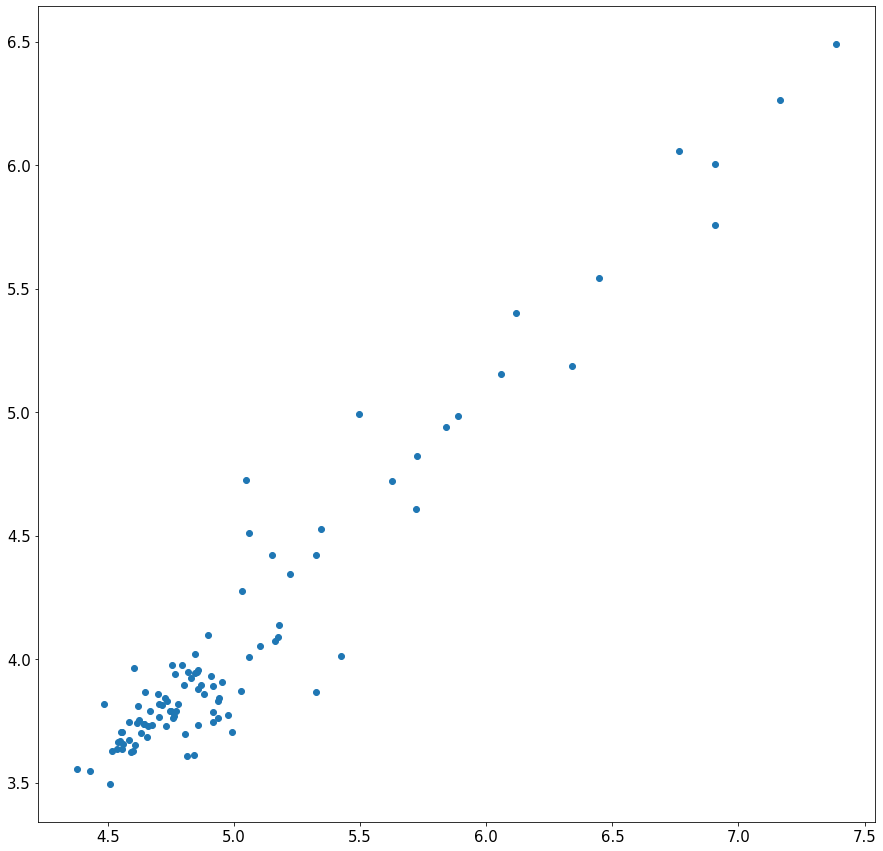

In [799]:
len(test_non_1),len(test_non_3),len(test_non_5),len(test_non_8),len(test_non_10),len(test_non_20)
#exp_data.shape
#t=test_non_8_all
plt.scatter(np.log10(t),np.log10(test_non_8_all))

In [794]:
rho.shape

(8, 84)

In [827]:
test_all_8=[]
for iter_idx,exp_data_idx in enumerate(np.arange(exp_data.shape[0])):
    
    if iter_idx%10==0:
        print(iter_idx)

    Y=exp_data[exp_data_idx:exp_data_idx+1].transpose().astype(float)

    cell_dataset=Cell_Dataset(Y,X,s)
    cell_dataloader=DataLoader(dataset=cell_dataset,shuffle=False,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)    
    
    if iter_idx==0:
        model=Custom_Model_Trick(Y,np.ones((8,1)),X_col=X.shape[1],delta_min=0,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
    else:
        model.init_parameter(Y=Y,delta_min=0)
    optimizer = optim.Adamax(model.parameters(),lr=LR)#,betas=(0.92, 0.999))
    #LL=run_EM_trick(model,optimizer,LL_diff_tolerance=LL_diff_tolerance,Q_diff_tolerance=Q_diff_tolerance)[1].detach().cpu().numpy()
    LL=run_EM_trick(model,optimizer,LL_diff_tolerance=1e+1*LL_diff_tolerance,Q_diff_tolerance=1e+1*Q_diff_tolerance,verbose=False)[1].detach().cpu().numpy()
    #print(LL)
    test_all_8.append(LL)
    

0


/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:95: RuntimeWarning: divide by zero encountered in log
/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:111: RuntimeWarning: divide by zero encountered in log


10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
222

In [826]:
len(test_non_8_all),exp_data.shape

(4814, (4898, 446))

(array([4.840e+02, 3.486e+03, 6.740e+02, 6.000e+01, 1.100e+01, 3.000e+00,
        3.000e+00, 3.000e+00, 3.000e+00, 5.000e+00]),
 array([2.88240283, 3.19686942, 3.511336  , 3.82580259, 4.14026917,
        4.45473576, 4.76920234, 5.08366893, 5.39813551, 5.7126021 ,
        6.02706868]),
 <a list of 10 Patch objects>)

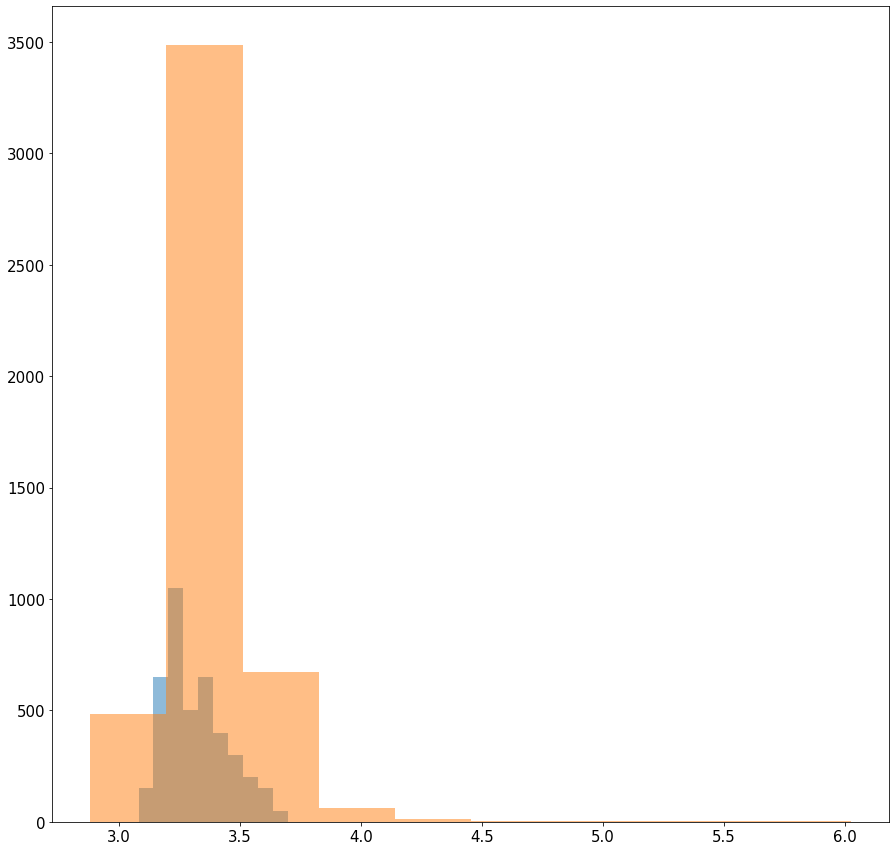

In [823]:
idx_check=np.array(list(map(lambda x: x in marker_unique_exp_data_idx,np.arange(len(test_non_8_all)))))
plt.hist(np.log10(np.array(test_non_8_all))[idx_check].repeat(50),alpha=0.5)
plt.hist(np.log10(np.array(test_non_8_all))[~idx_check],alpha=0.5)

In [813]:
test_20=[]
#for iter_idx,exp_data_idx in enumerate(nonmarker):
#for iter_idx,exp_data_idx in enumerate(np.arange(exp_data.shape[0]):
for iter_idx,exp_data_idx in enumerate(marker_unique_exp_data_idx):
    if exp_data_idx in marker_unique_exp_data_idx:
        pass
        #continue
    if iter_idx==100:
        break
    
    Y=exp_data[exp_data_idx:exp_data_idx+1].transpose().astype(float)

    cell_dataset=Cell_Dataset(Y,X,s)
    cell_dataloader=DataLoader(dataset=cell_dataset,shuffle=False,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)    
    
    if iter_idx==0:
        model=Custom_Model_Trick(Y,np.ones((20,1)),X_col=X.shape[1],delta_min=0,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
    else:
        model.init_parameter(Y=Y,delta_min=0)
    optimizer = optim.Adam(model.parameters(),lr=LR)#,betas=(0.92, 0.999))
    #LL=run_EM_trick(model,optimizer,LL_diff_tolerance=LL_diff_tolerance,Q_diff_tolerance=Q_diff_tolerance)[1].detach().cpu().numpy()
    LL=run_EM_trick(model,optimizer,LL_diff_tolerance=LL_diff_tolerance,Q_diff_tolerance=Q_diff_tolerance,verbose=False)[1].detach().cpu().numpy()
    print(LL)
    test_20.append(LL)
    

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:95: RuntimeWarning: divide by zero encountered in log


4985.486536713561


/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:111: RuntimeWarning: divide by zero encountered in log


1489.2347446622384
806.9797733501681
2451.0536827863302
1455.4955137356128
740.5249598496073
1571.005341006617
1297.0390625059304
1692.014908092879
1030.4031480926797
1646.6236559933263
1128.3832114425402
1228.474169361336
2755.5777450128717
1544.5764062034743
871.2401905919489
1423.6582923730796
1030.0142087120093
1267.6332121053256
1549.5336890547107
860.9632534741753
749.9185238863026
945.3308161862534
1124.4840141476507
1536.7712630979624
1341.9823658639814
1397.6348238119422
887.0800628268771
1020.7476744723531
1542.422208667299
1012.5424929302691
1758.1173260302776
1390.3215309106072
1010.5576005019423
1048.0311516597753
2168.333527547025
1386.6332607402333
1505.9444795947634
2014.8843463454477
901.8839524408841
2022.5726986653287
1167.0413531444149
1684.796633323391
1626.2412124140176
2081.752730938667
1071.1852933420087
881.400634762196
918.3705267156797
1660.5802400555356
1069.9011278777712
1046.3554325435637
1034.604688000009
1336.4368556801278
5706.067789812248
1158.04861537

In [803]:
model.delta_log

Parameter containing:
tensor([[0.4959, 0.4955, 0.4959, 0.4955, 0.4947],
        [0.8870, 2.3348, 1.8482, 1.7343, 1.5609],
        [1.4333, 1.4329, 1.4331, 1.4333, 1.4329],
        [1.1297, 1.1297, 1.1297, 1.1294, 1.1298],
        [1.7768, 2.1708, 1.6082, 1.7507, 1.2415]], device='cuda:2',
       requires_grad=True)

In [742]:
test_20=[]
for iter_idx,exp_data_idx in enumerate(marker_unique_exp_data_idx):
    Y=exp_data[exp_data_idx:exp_data_idx+1].transpose().astype(float)

    cell_dataset=Cell_Dataset(Y,X,s)
    cell_dataloader=DataLoader(dataset=cell_dataset,shuffle=False,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)    
    
    if iter_idx==0:
        model=Custom_Model_Trick(Y,np.ones((20,1)),X_col=X.shape[1],delta_min=0,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
    else:
        model.init_parameter(Y=Y,delta_min=0)
    optimizer = optim.Adam(model.parameters(),lr=LR)#,betas=(0.92, 0.999))
    LL=run_EM_trick(model,optimizer,LL_diff_tolerance=LL_diff_tolerance,Q_diff_tolerance=Q_diff_tolerance,verbose=False)[1].detach().cpu().numpy()
    print(LL)
    test_20.append(LL)

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:95: RuntimeWarning: divide by zero encountered in log


301313.2465923544
65004.6744090039


/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:111: RuntimeWarning: divide by zero encountered in log


39375.21795967655
243205.49192281926
33366.54840514859
23210.16660545817
174910.76293051738
67514.74211623815
129205.86878872692
46592.354571067975
62584.7232017582
74126.71781699701
34970.639186655746
250218.2760177329
50976.78653330974
6566.503693179471
83626.82921094782
38626.49593068627
34731.28830888661
58155.37289791393
21618.521247697787
13199.739221025407
40000.08246494954
63315.3064312334
105528.55456771118
69503.68470792596
116033.30862624585
46490.59310649877
62144.79097374217
89415.66779767332
77196.8090330259
146061.7081376033
32285.065206663272
36286.40750162545
58867.004427467546
177404.06848883122
107643.76265029679
43473.83406636523
122291.7866315238
26308.197929353013
167958.38943584307
64443.705401588406
132835.56223835668
138784.43821018323
234261.0057934899
27302.5699974104
24320.16433275638
24400.351310630478
117017.93623170162
28028.78030918246
37948.80261850233
40483.08703318608
58027.560881611666
289868.02239047195
40012.43960862873
157391.90130800576
52364.657

(array([ 9.,  9., 10., 16., 15.,  6.,  6.,  5.,  5.,  3.]),
 array([3.09804555, 3.18290379, 3.26776202, 3.35262025, 3.43747849,
        3.52233672, 3.60719495, 3.69205319, 3.77691142, 3.86176965,
        3.94662788]),
 <a list of 10 Patch objects>)

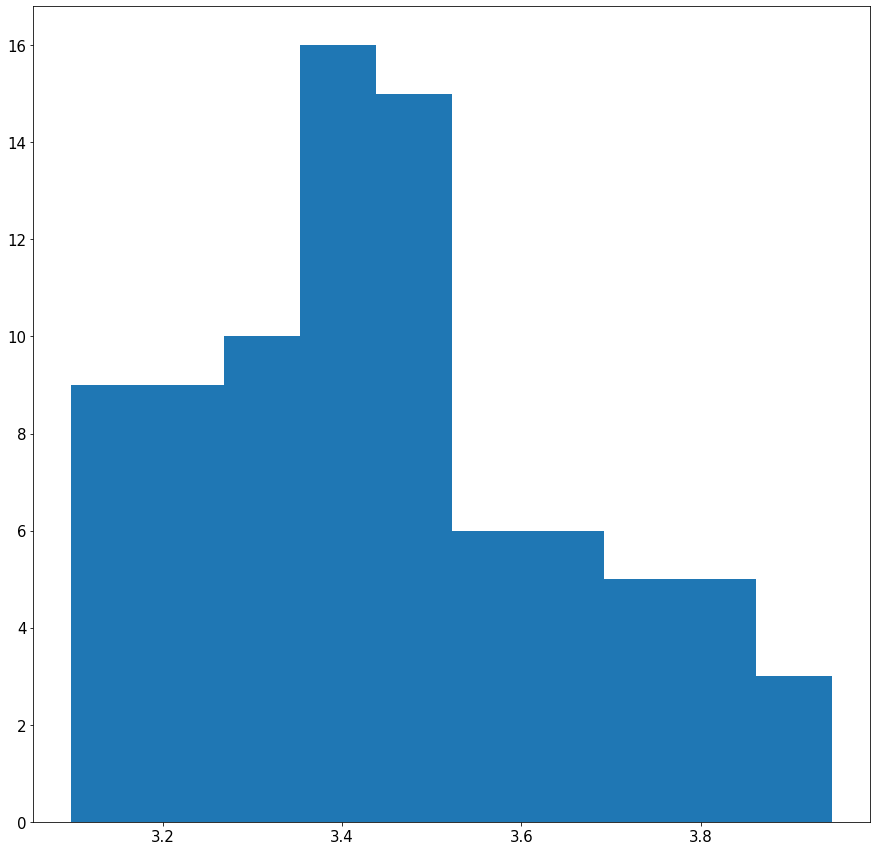

In [427]:
plt.hist(np.log10(result_8))

(array([38., 29., 14.,  6.,  3.,  1.,  4.,  0.,  0.,  5.]),
 array([3.62520997, 3.86830039, 4.11139081, 4.35448123, 4.59757166,
        4.84066208, 5.0837525 , 5.32684292, 5.56993335, 5.81302377,
        6.05611419]),
 <a list of 10 Patch objects>)

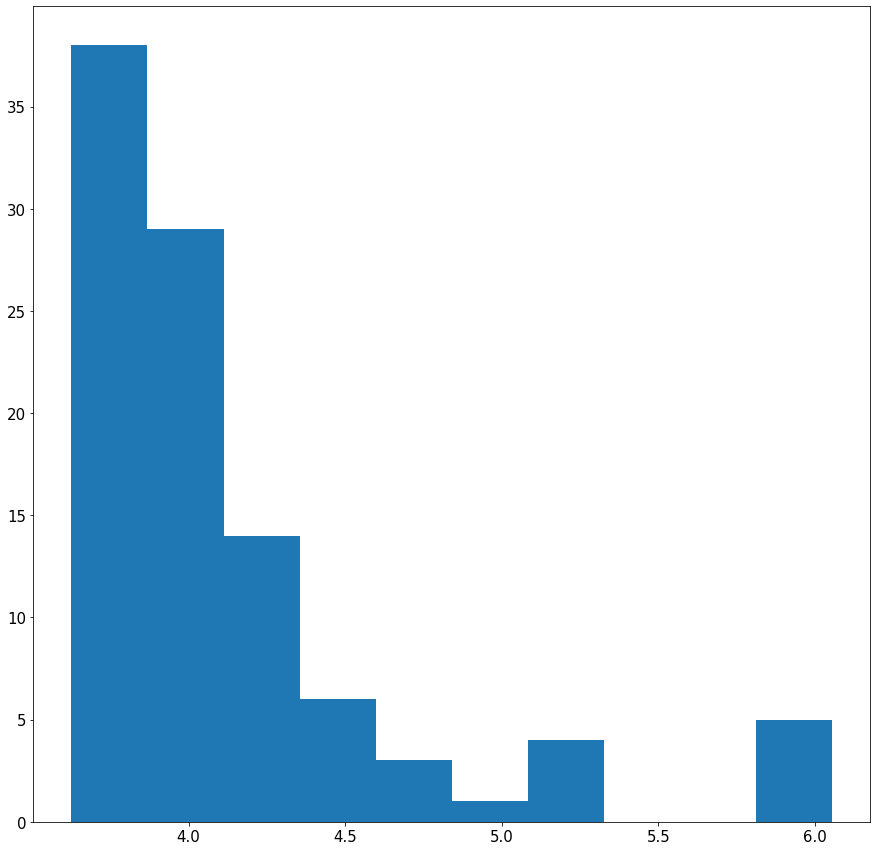

In [426]:
plt.hist(np.log10(result1_8))

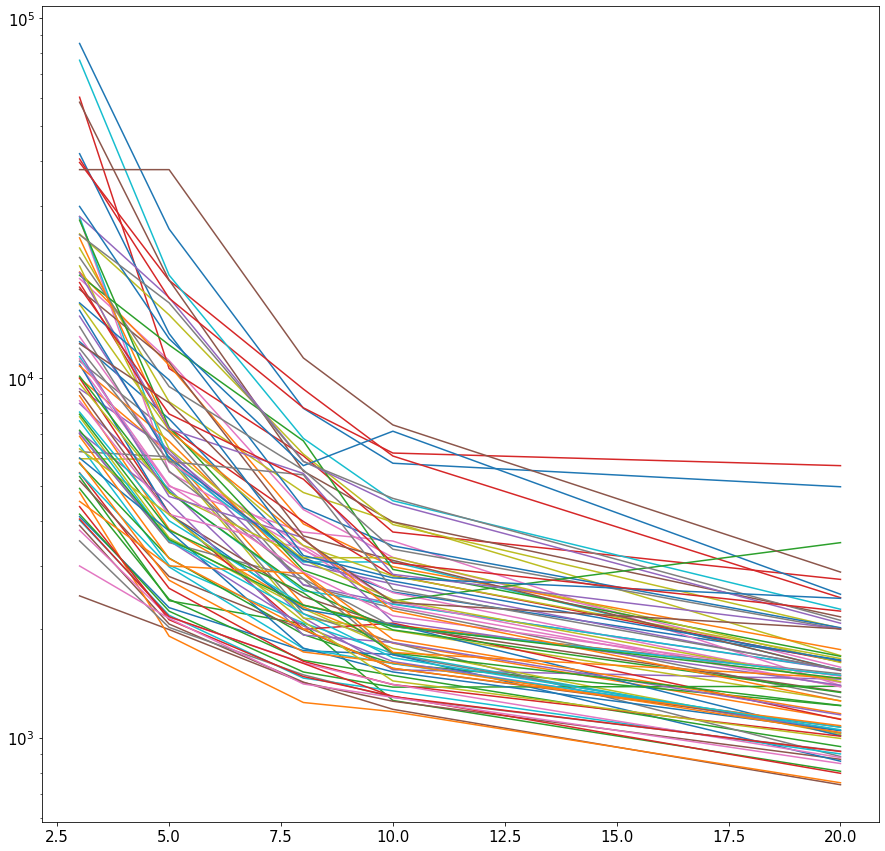

In [816]:
plt.plot([3,5,8,10,20],np.array([test_3,test_5,test_8,test_10,test_20]))
plt.yscale("log")

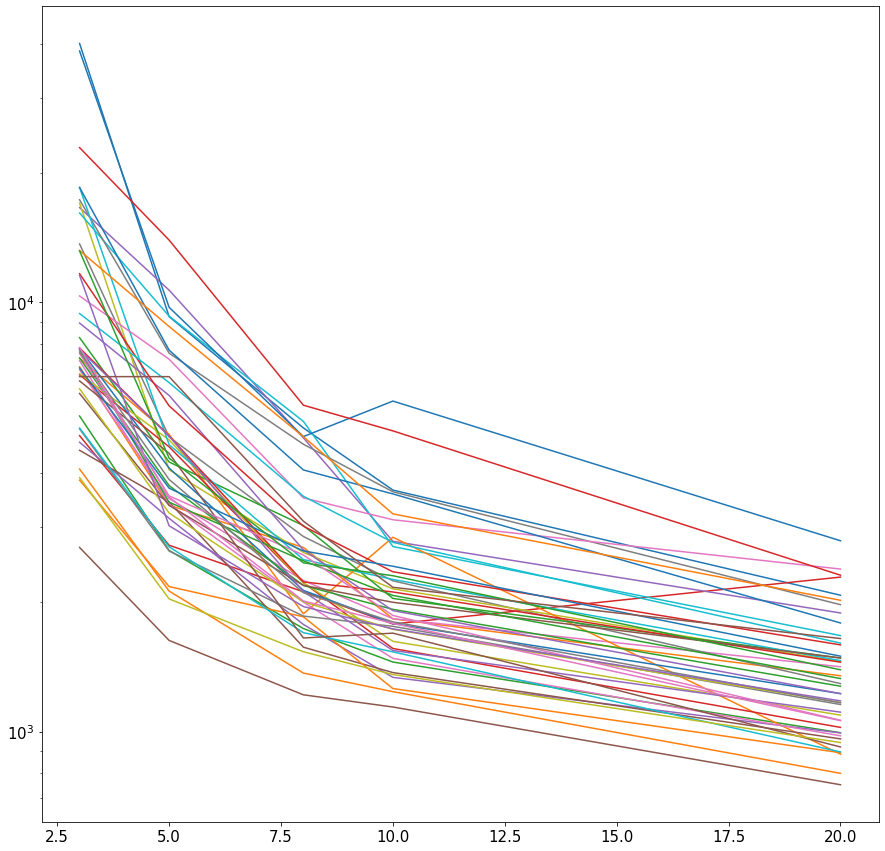

In [819]:
plt.plot([3,5,8,10,20],np.array([test_non_3,test_non_5,test_non_8,test_non_10,test_non_20]))
plt.yscale("log")

In [ ]:
result1_10=[]
for iter_idx,exp_data_idx in enumerate(np.arange(exp_data.shape[0])):
    if iter_idx%10==0:
        print(iter_idx)
    Y=exp_data[exp_data_idx:exp_data_idx+1].transpose().astype(float)

    cell_dataset=Cell_Dataset(Y,X,s)
    cell_dataloader=DataLoader(dataset=cell_dataset,shuffle=False,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)    
    
    if iter_idx==0:
        model=Custom_Model_Trick(Y,np.ones((10,1)),X_col=X.shape[1],delta_min=0,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
    else:
        model.init_parameter(Y=Y,delta_min=0)
    optimizer = optim.Adam(model.parameters(),lr=LR)#,betas=(0.92, 0.999))
    LL=run_EM_trick(model,optimizer,LL_diff_tolerance=1e+2*LL_diff_tolerance,Q_diff_tolerance=1e+2*Q_diff_tolerance,verbose=False)[1].detach().cpu().numpy()
    #print(LL)
    result1_10.append(LL)

In [ ]:
result1_1=[]
for iter_idx,exp_data_idx in enumerate(np.arange(exp_data.shape[0])):
#for iter_idx,exp_data_idx in enumerate(marker_unique_exp_data_idx):
    if iter_idx%10==0:
        print(iter_idx)
        print(LL)
    Y=exp_data[exp_data_idx:exp_data_idx+1].transpose().astype(float)

    cell_dataset=Cell_Dataset(Y,X,s)
    cell_dataloader=DataLoader(dataset=cell_dataset,shuffle=False,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)    
    
    if iter_idx==0:
        model=Custom_Model_Trick(Y,np.ones((1,1)),X_col=X.shape[1],delta_min=0,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
    else:
        model.init_parameter(Y=Y,delta_min=0)
    optimizer = optim.Adam(model.parameters(),lr=LR)#,betas=(0.92, 0.999))
    LL=run_EM_trick(model,optimizer,LL_diff_tolerance=1e+2*LL_diff_tolerance,Q_diff_tolerance=1e+2*Q_diff_tolerance,verbose=False)[1].detach().cpu().numpy()
    #print(LL)
    """
    with torch.no_grad():
        for batch_idx,batch in enumerate(cell_dataloader):
            batch_Y=batch['Y'].to(device)
            batch_X=batch['X'].to(device)
            batch_s=batch['s'].to(device)    
        gamma_new=Poisson_Function.apply(batch_Y,batch_X,batch_s,model.delta_log,model.beta,model.masked.mask,'gamma').cpu().numpy()
        print(LL,np.unique(np.argmax(gamma_new,axis=1),return_counts=True))
    """
    result1_1.append(LL)

(array([3.750e+02, 2.036e+03, 1.892e+03, 4.390e+02, 9.800e+01, 3.300e+01,
        1.400e+01, 5.000e+00, 5.000e+00, 1.000e+00]),
 array([ 2.34601554, 10.44242417, 18.53883281, 26.63524145, 34.73165008,
        42.82805872, 50.92446736, 59.02087599, 67.11728463, 75.21369326,
        83.3101019 ]),
 <a list of 10 Patch objects>)

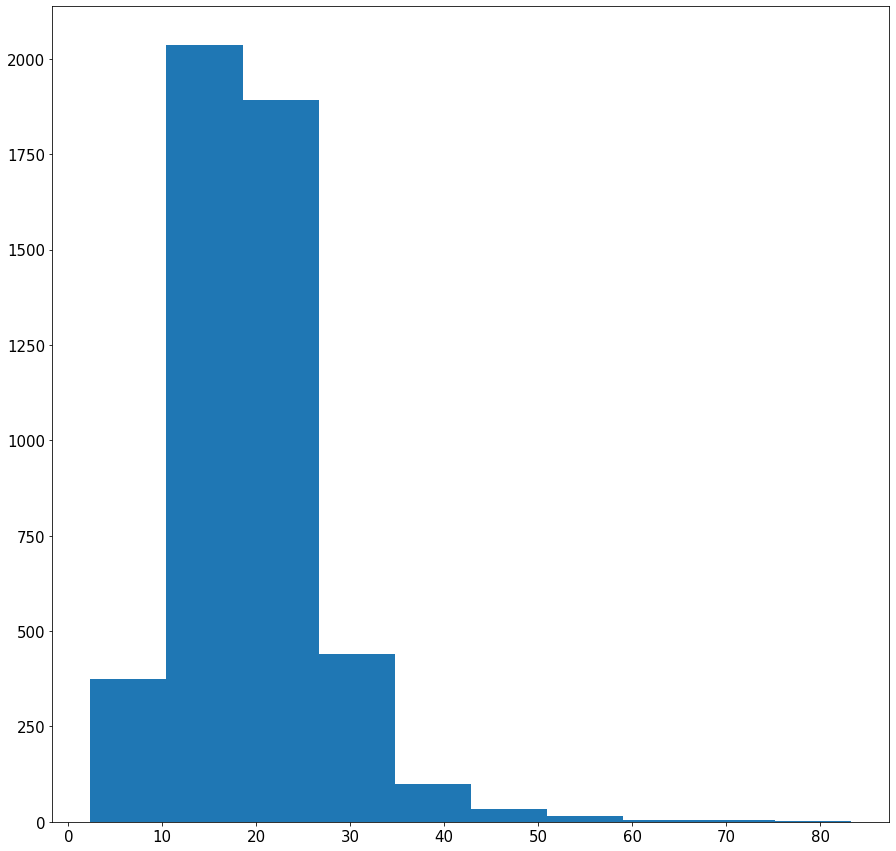

In [585]:
#np.unique(np.argmax(gamma_new,axis=1),return_counts=True),np.unique(np.argmax(np.where(gamma_new>0.99,gamma_new,0),axis=1),return_counts=True)
#model.delta_log
#plt.scatter(np.log(result1_1),np.log(-np.array(ll_list)))#len(result1_1),len(ll_list)
#plt.scatter(result1_1,ll_list)
#np.array(result1_1)
#len(np.array(result1_10))
plt.hist(np.array(result1_1)/np.array(result1_10))

(array([3.740e+02, 2.026e+03, 1.868e+03, 4.210e+02, 8.900e+01, 2.600e+01,
        7.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([ 2.34601554, 10.44242417, 18.53883281, 26.63524145, 34.73165008,
        42.82805872, 50.92446736, 59.02087599, 67.11728463, 75.21369326,
        83.3101019 ]),
 <a list of 10 Patch objects>)

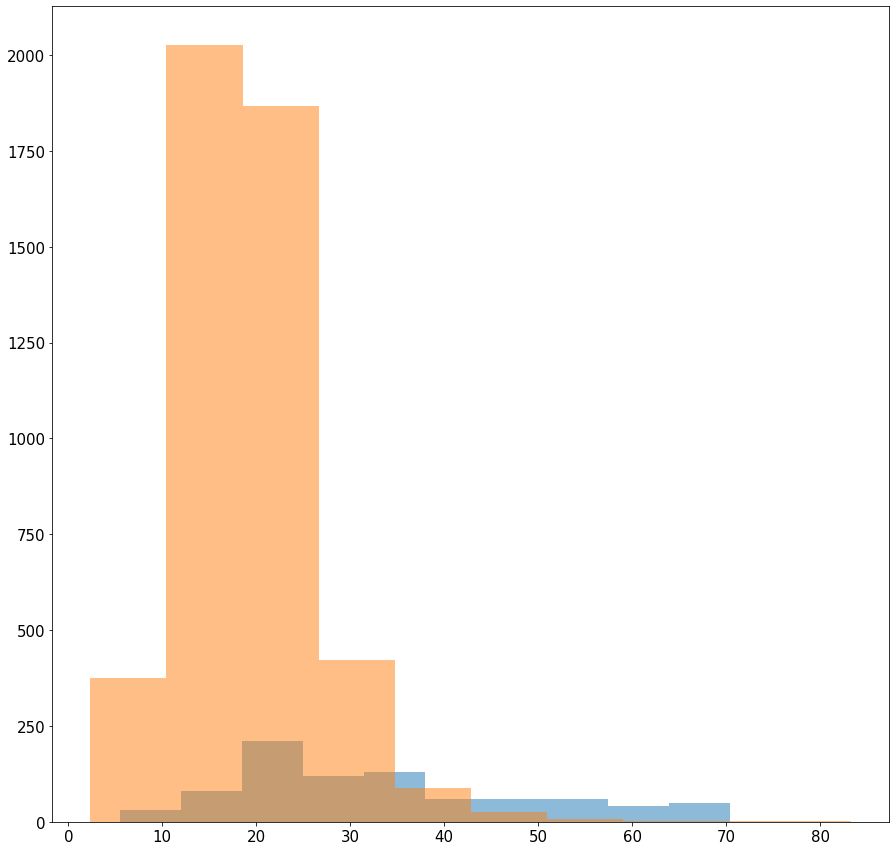

In [590]:
plt.hist((np.array(result1_1)/np.array(result1_10))[idx_check].repeat(10),alpha=0.5)
plt.hist((np.array(result1_1)/np.array(result1_10))[~idx_check],alpha=0.5)

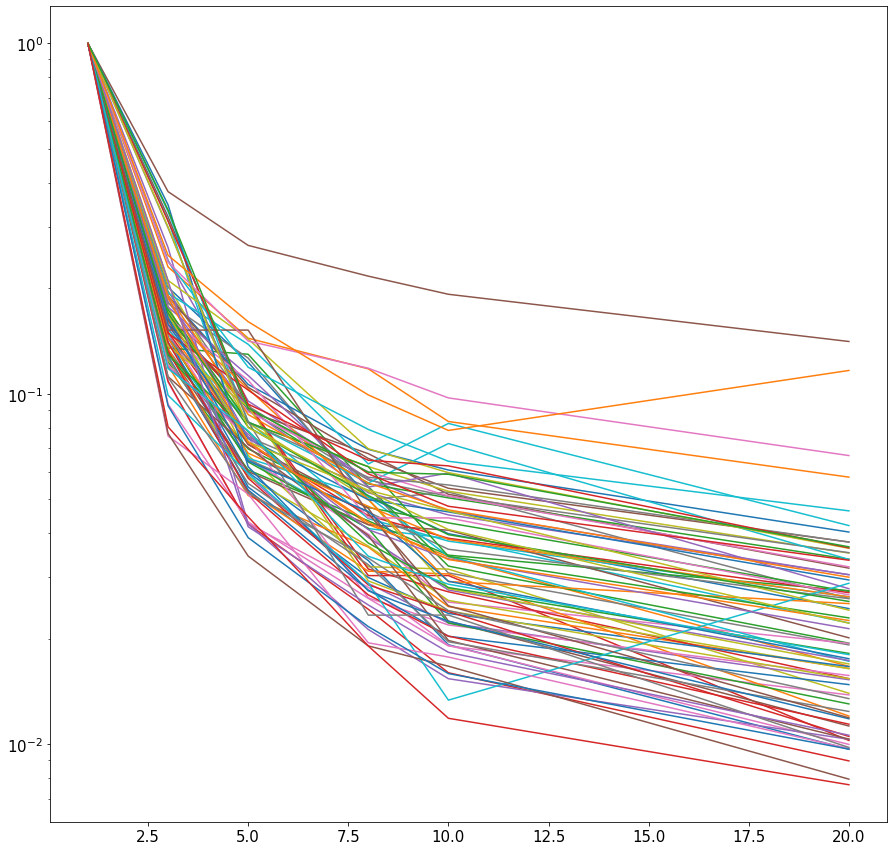

In [774]:
temp=np.array([test_1,test_3,test_5,test_8,test_10,test_20])
temp=temp/temp[0,:]

plt.plot([1,3,5,8,10,20],temp)
plt.yscale("log")

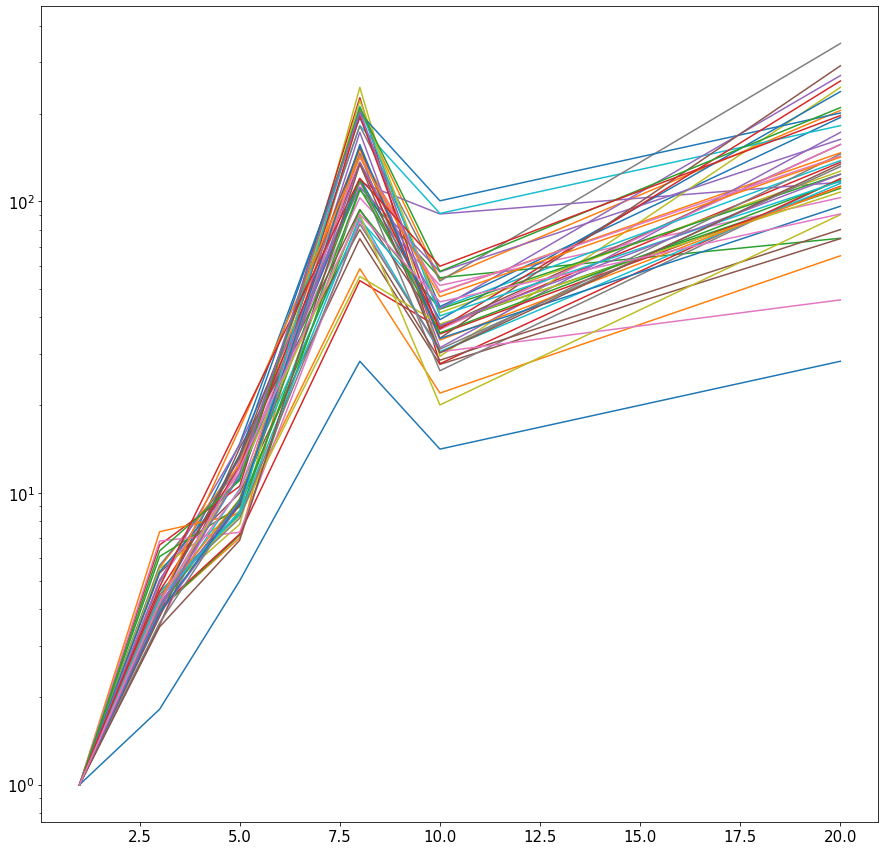

In [775]:
temp=np.array([test_non_1,test_non_3,test_non_5,test_non_8,test_non_10,test_non_20])
temp=temp/temp[0,:]

plt.plot([1,3,5,8,10,20],temp)
plt.yscale("log")

(array([ 2.,  2.,  4.,  8., 14.,  4.,  6.,  3.,  3.,  1.]),
 array([4.7312004 , 4.84040763, 4.94961485, 5.05882207, 5.1680293 ,
        5.27723652, 5.38644375, 5.49565097, 5.60485819, 5.71406542,
        5.82327264]),
 <a list of 10 Patch objects>)

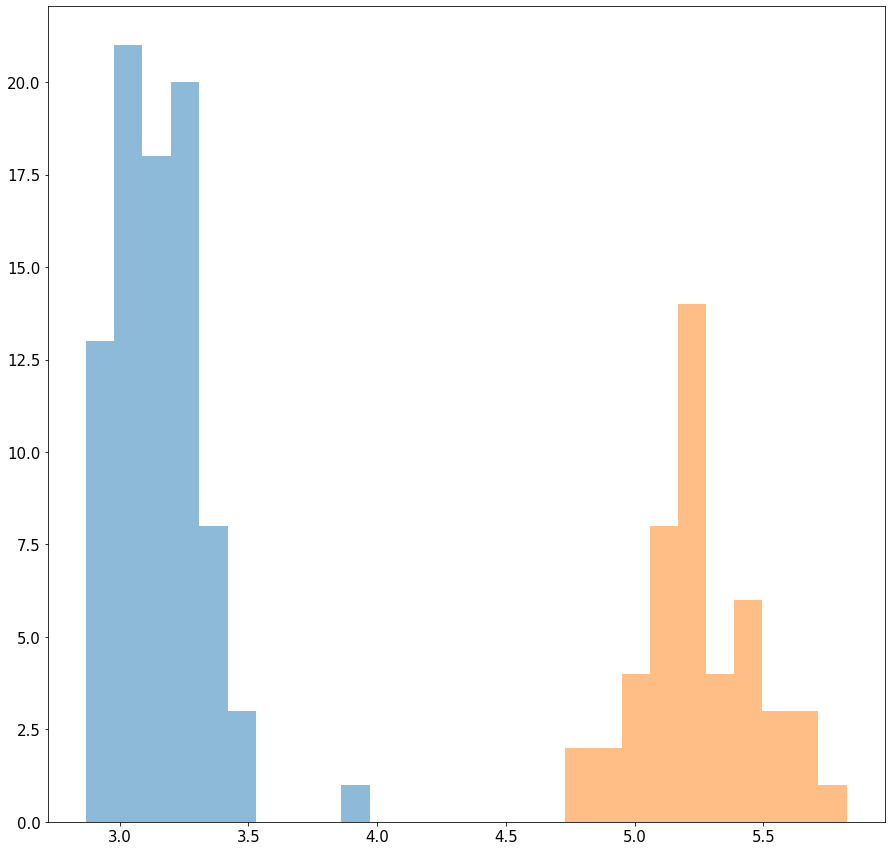

In [772]:
#temp/temp[0,:]
plt.hist(np.log10(test_20),alpha=0.5)
plt.hist(np.log10(test_non_20),alpha=0.5)

In [287]:
run_EM_trick(model,optimizer, LL_diff_tolerance=1e-3*LL_diff_tolerance,Q_diff_tolerance=1e-3*Q_diff_tolerance)

Start time: 2020-05-19 21:45:11
tensor(-8474.1303, device='cuda:2')
M: 0, Q: 8474.13034878733 Q_diff: -2.0
M: 20, Q: 1807.6805616050829 Q_diff: 0.7866824692089182
M: 40, Q: 1550.8314866018752 Q_diff: 0.14208764560434572
M: 60, Q: 1492.1519066068367 Q_diff: 0.03783749588655502
M: 80, Q: 1457.772666434173 Q_diff: 0.023040040374201782
M: 100, Q: 1455.4543063762076 Q_diff: 0.0015903440305520228
M: 120, Q: 1454.8322922061568 Q_diff: 0.0004273677073376855
M: 140, Q: 1453.494084584654 Q_diff: 0.0009198363472352251
M: 160, Q: 1439.5548344963422 Q_diff: 0.0095901663695419
M: 180, Q: 1374.7981613686666 Q_diff: 0.044983818313758146
M: 200, Q: 1369.5162130469853 Q_diff: 0.003841980932257644
M: 220, Q: 1369.1327447350268 Q_diff: 0.0002800027544802342
M: 240, Q: 1369.0171142411227 Q_diff: 8.445528335270526e-05
M: 260, Q: 1369.0084516850463 Q_diff: 6.3275732540346106e-06
M: 280, Q: 1369.0081890065806 Q_diff: 1.9187497744403234e-07
M: 300, Q: 1369.0079807663924 Q_diff: 1.521102575062934e-07
M: 320, Q:

(tensor([[ 5.0000e-01,  6.9915e-54,  5.0000e-01,  ...,  2.4291e-22,
          1.3478e-182,  0.0000e+00],
         [ 5.0001e-01,  1.1023e-54,  4.9999e-01,  ...,  8.0194e-24,
          6.2077e-179,  0.0000e+00],
         [ 2.5151e-01,  9.9484e-12,  2.5152e-01,  ...,  2.7393e-04,
           6.8110e-44,  0.0000e+00],
         ...,
         [ 1.4392e-04,  1.7378e-16,  1.4395e-04,  ...,  1.3959e-04,
           4.3981e-72,  0.0000e+00],
         [ 4.9888e-01,  2.1989e-19,  4.9887e-01,  ...,  5.0285e-09,
           8.6588e-61,  0.0000e+00],
         [ 1.6324e-74,  9.9992e-01,  1.6352e-74,  ...,  8.1681e-05,
           1.6617e-42,  0.0000e+00]], device='cuda:2'),
 tensor(1369.0079, device='cuda:2', grad_fn=<NegBackward>),
 tensor(-1369.0079, device='cuda:2'))

In [510]:

#for iter_idx,exp_data_idx in enumerate(np.arange(exp_data.shape[0])):
for iter_idx,exp_data_idx in enumerate(marker_unique_exp_data_idx):    
    Y=exp_data[exp_data_idx:exp_data_idx+1].transpose().astype(float)

    cell_dataset=Cell_Dataset(Y,X,s)
    cell_dataloader=DataLoader(dataset=cell_dataset,shuffle=False,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)    
    
    if iter_idx==0:
        model=Custom_Model_Trick(Y,np.ones((20,1)),X_col=X.shape[1],delta_min=0,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
    else:
        model.init_parameter(Y=Y,delta_min=0)
    optimizer = optim.Adam(model.parameters(),lr=LR)#,betas=(0.92, 0.999))
    LL=run_EM_trick(model,optimizer,LL_diff_tolerance=LL_diff_tolerance,Q_diff_tolerance=Q_diff_tolerance,verbose=False)[1].detach().cpu().numpy()
    print(LL)
    break
model.delta_log

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:95: RuntimeWarning: divide by zero encountered in log


3027.898450742996


Parameter containing:
tensor([[1.0721],
        [1.7320],
        [1.9287],
        [0.4667],
        [2.0186],
        [2.1226],
        [1.8651],
        [1.8350],
        [1.6909],
        [2.4269],
        [1.7818],
        [2.6847],
        [1.9677],
        [1.5756],
        [1.2576],
        [1.6345],
        [1.8121],
        [1.9015],
        [1.4173],
        [1.5083]], device='cuda:2', requires_grad=True)

In [486]:

for iter_idx,exp_data_idx in enumerate(marker_unique_exp_data_idx):
    Y=exp_data[exp_data_idx:exp_data_idx+1].transpose().astype(float)

    cell_dataset=Cell_Dataset(Y,X,s)
    cell_dataloader=DataLoader(dataset=cell_dataset,shuffle=False,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)    
    
    if iter_idx==0:
        model=Custom_Model_Trick(Y,np.ones((20,1)),X_col=X.shape[1],delta_min=0,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
    else:
        model.init_parameter(Y=Y,delta_min=0)
    optimizer = optim.Adam(model.parameters(),lr=LR)#,betas=(0.92, 0.999))
    LL=run_EM_trick(model,optimizer,LL_diff_tolerance=LL_diff_tolerance,Q_diff_tolerance=Q_diff_tolerance,verbose=False)[1].detach().cpu().numpy()
    print(LL)
    break

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:95: RuntimeWarning: divide by zero encountered in log


2781.173189021027


(array([7.900e+02, 3.513e+03, 5.160e+02, 5.000e+01, 1.700e+01, 3.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 5.000e+00]),
 array([2.85137531, 3.16894488, 3.48651445, 3.80408402, 4.12165359,
        4.43922317, 4.75679274, 5.07436231, 5.39193188, 5.70950145,
        6.02707102]),
 <a list of 10 Patch objects>)

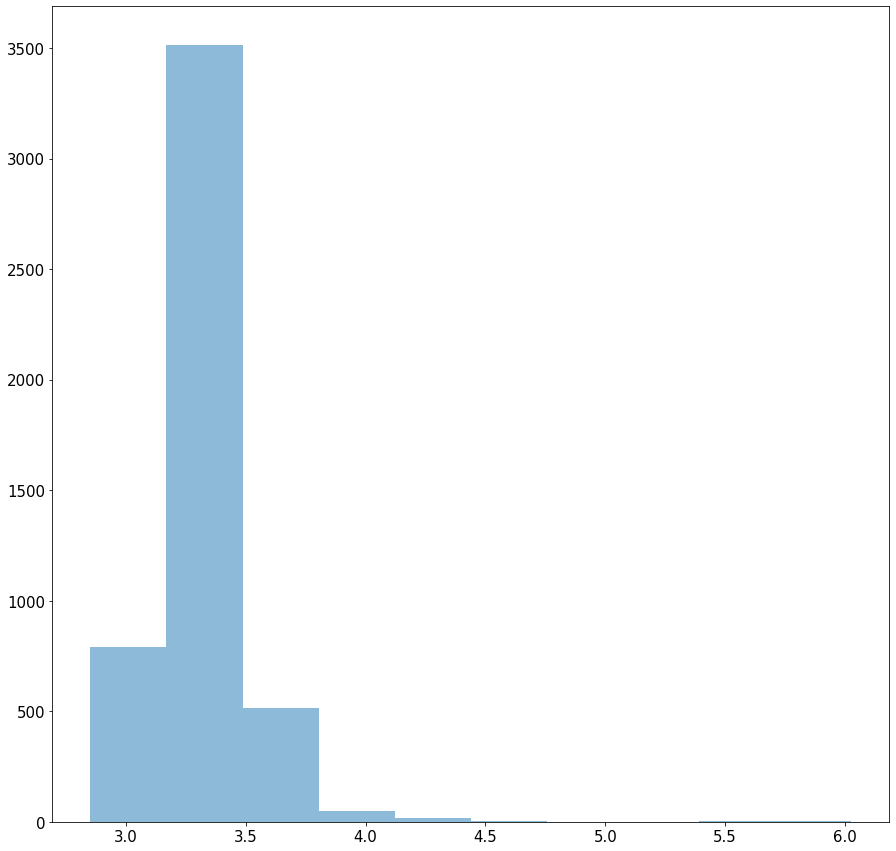

In [532]:
plt.hist(np.log10(np.array(important)),alpha=0.5)

(array([7.77e+02, 3.46e+03, 4.98e+02, 5.00e+01, 1.70e+01, 3.00e+00,
        1.00e+00, 1.00e+00, 2.00e+00, 5.00e+00]),
 array([2.85137531, 3.16894488, 3.48651445, 3.80408402, 4.12165359,
        4.43922317, 4.75679274, 5.07436231, 5.39193188, 5.70950145,
        6.02707102]),
 <a list of 10 Patch objects>)

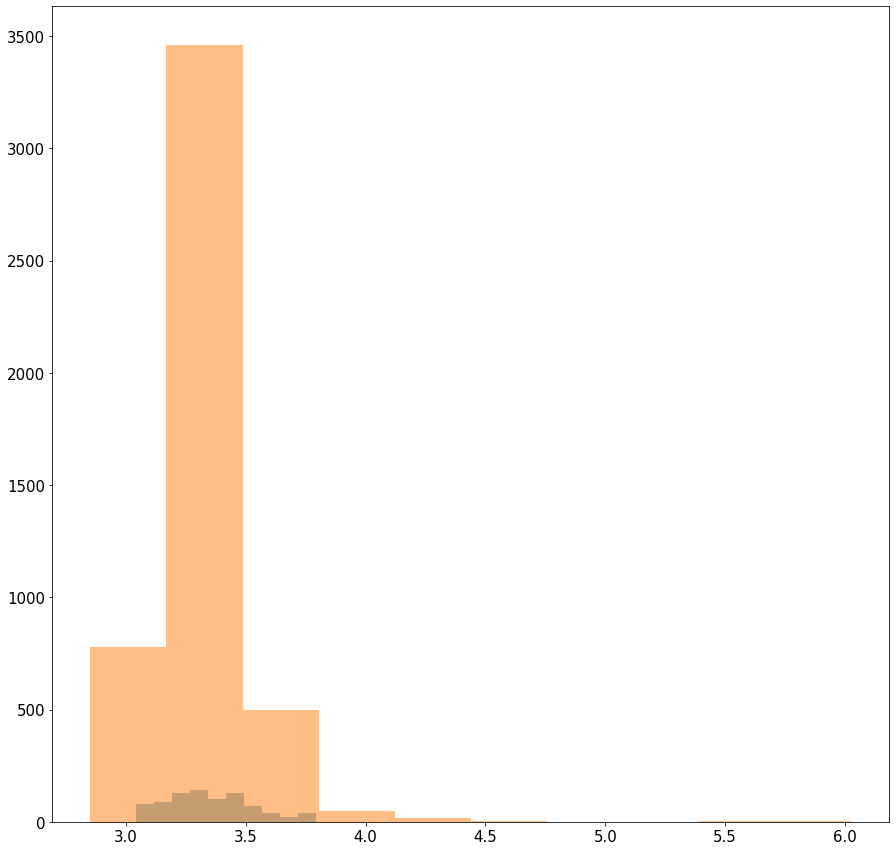

In [542]:
np.log10(np.array(important))[~idx_check],len(exp_data),len(idx_check)

(array([5.85940968, 5.83402385, 6.02707102, ..., 3.19857067, 3.04575235,
        3.07712518]), 4898, 4898)

(array([ 2,  3,  5,  6,  7,  9, 10]), array([ 63,  44,  70, 139,  74,  55,   1])) Parameter containing:
tensor([[ 0.3901,  1.9791, -1.9726,  ..., -0.0991,  0.6509, -1.6519],
        [ 0.1887, -1.3242,  1.4351,  ..., -0.8885,  1.0570, -1.1572],
        [ 0.7964,  0.5446, -0.0874,  ...,  0.9014,  1.4570,  1.5517],
        ...,
        [ 0.3205,  0.5216,  0.1958,  ...,  1.1669,  1.6719,  1.9840],
        [ 1.8278,  0.1196,  1.8322,  ...,  0.9410,  0.1991, -0.6805],
        [-0.5992,  1.0832, -0.6261,  ...,  1.0623,  0.8559,  0.7790]],
       device='cuda:2', requires_grad=True)


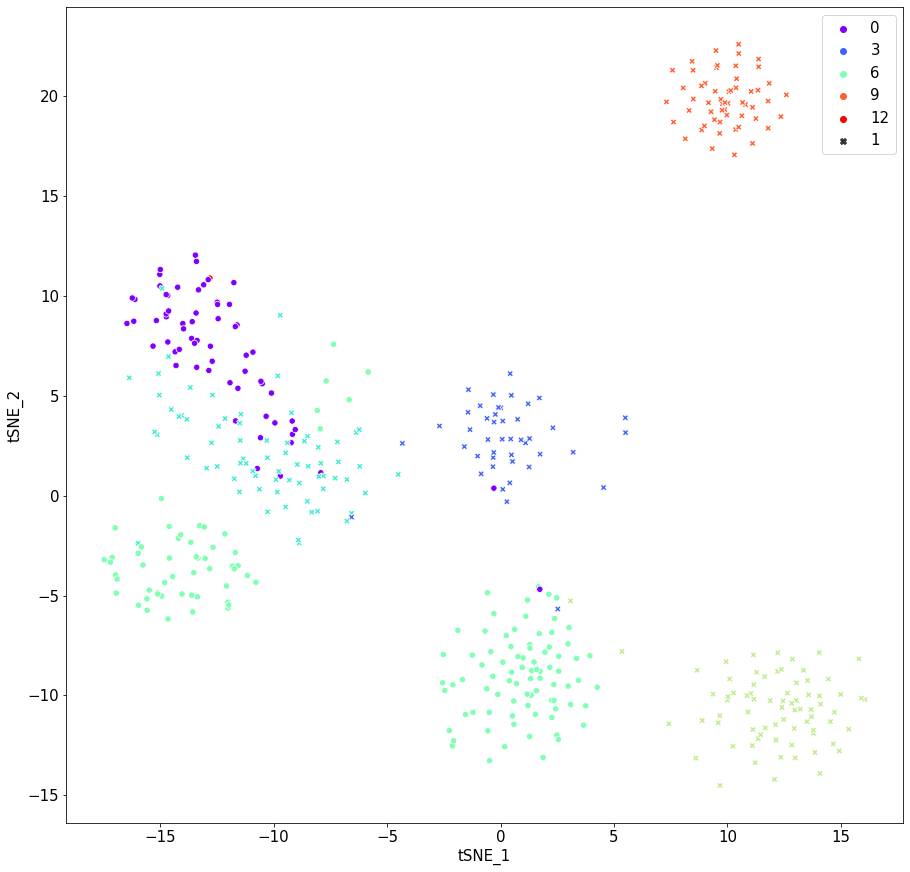

In [614]:
import seaborn as sns

with torch.no_grad():
    for batch_idx,batch in enumerate(cell_dataloader):
        batch_Y=batch['Y'].to(device)
        batch_X=batch['X'].to(device)
        batch_s=batch['s'].to(device)    
    gamma_new=Poisson_Function.apply(batch_Y,batch_X,batch_s,model.delta_log,model.beta,model.masked.mask,'gamma')

plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams["font.size"] = 15
plt.rcParams['font.family']='Arial'


plot_value=np.argmax(gamma_new.cpu().numpy(),axis=1)

sns.scatterplot(x="tSNE_1", y="tSNE_2",hue=plot_value,style=np.array((list(range(0,2))*30))[plot_value],
                data=exp_data_meta,s=40,palette=plt.cm.rainbow)#,linewidth=0.3)

print(np.unique(plot_value,return_counts=True),model.delta_log)

In [615]:
np.unique(plot_value,return_counts=True),model.delta_log

((array([ 2,  3,  5,  6,  7,  9, 10]),
  array([ 63,  44,  70, 139,  74,  55,   1])),
 Parameter containing:
 tensor([[ 0.3901,  1.9791, -1.9726,  ..., -0.0991,  0.6509, -1.6519],
         [ 0.1887, -1.3242,  1.4351,  ..., -0.8885,  1.0570, -1.1572],
         [ 0.7964,  0.5446, -0.0874,  ...,  0.9014,  1.4570,  1.5517],
         ...,
         [ 0.3205,  0.5216,  0.1958,  ...,  1.1669,  1.6719,  1.9840],
         [ 1.8278,  0.1196,  1.8322,  ...,  0.9410,  0.1991, -0.6805],
         [-0.5992,  1.0832, -0.6261,  ...,  1.0623,  0.8559,  0.7790]],
        device='cuda:2', requires_grad=True))

In [503]:
important=result1_10

([array([446.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([446.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([446.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([446.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([446.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([362.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  84.]),
  array([291.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 155.]),
  array([239.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 207.]),
  array([446.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([446.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])],
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Lists of Patches objects>)

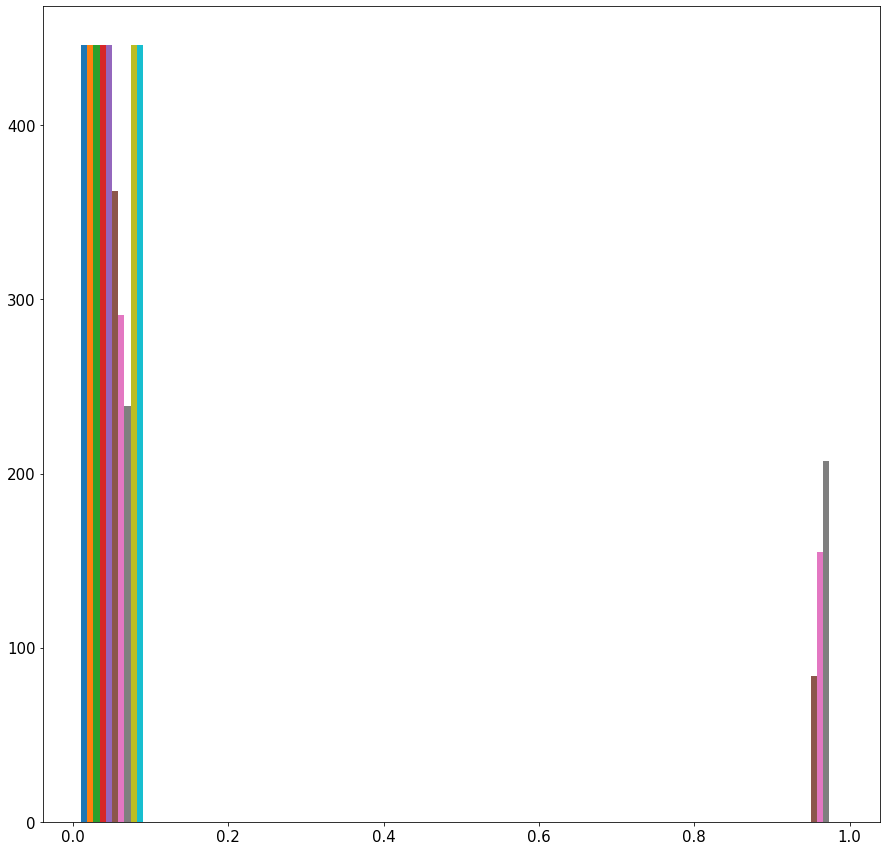

In [228]:
plt.hist(gamma_new.cpu().numpy())

In [851]:
import statsmodels.api as sm
import sys

family=sm.families.Poisson(link=sm.families.links.log())

ll_list=[]
for exp_data_row_idx in range(exp_data.shape[0]):
    if exp_data_row_idx%100==0:
        sys.stdout.write('\r{}'.format(exp_data_row_idx))
    y_data=exp_data[exp_data_row_idx,:]
    model=sm.GLM(y_data,x_data_null,family=family)
    model_result=model.fit()
    #model_result.summary()
    ll_list.append(model_result.llf)
    #ll_list.append([model_result.llf,model_result.deviance,model_result.pearson_chi2])
#model_result.llf,model_result.llnull,model_result.null_deviance,model_result.null

4800

In [852]:
import statsmodels.api as sm
import sys

family=sm.families.Poisson(link=sm.families.links.log())

chisq_list=[]
for exp_data_row_idx in range(exp_data.shape[0]):
    if exp_data_row_idx%100==0:
        sys.stdout.write('\r{}'.format(exp_data_row_idx))
    y_data=exp_data[exp_data_row_idx,:]
    model=sm.GLM(y_data,x_data_null,family=family)
    model_result=model.fit()
    #model_result.summary()
    chisq_list.append(model_result.pearson_chi2)
    #ll_list.append([model_result.llf,model_result.deviance,model_result.pearson_chi2])
#model_result.llf,model_result.llnull,model_result.null_deviance,model_result.null

4800

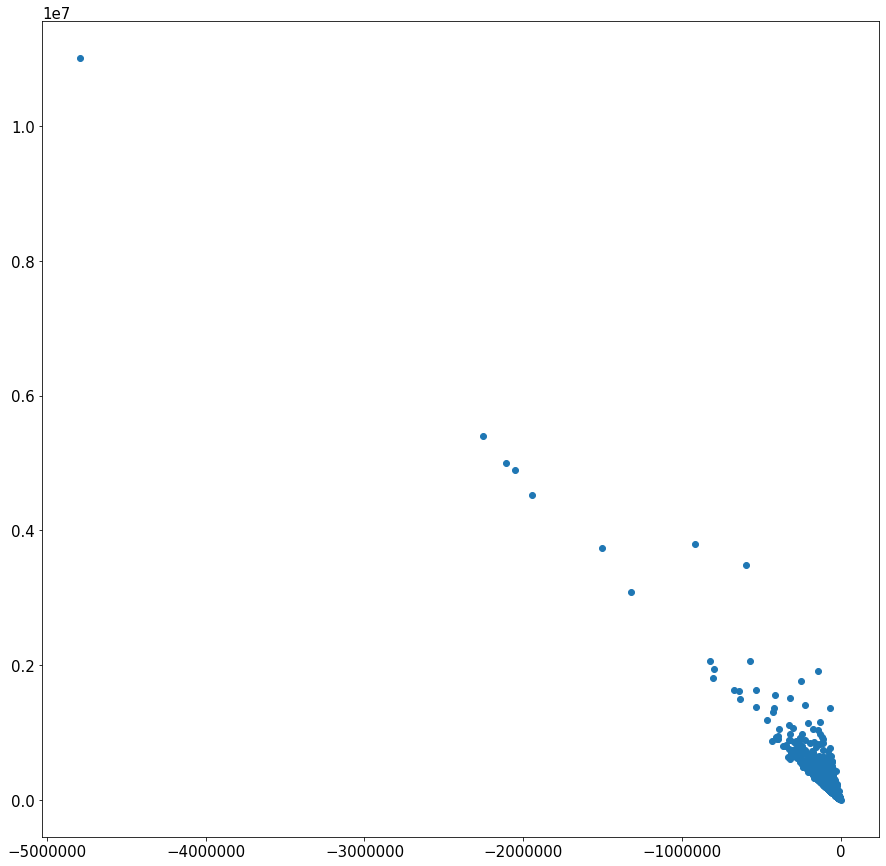

In [853]:
plt.scatter(ll_list,chisq_list)

In [856]:
model_result.pearson_chi2,np.sum(model_result.resid_pearson**2)

(78817.8753268467, 78817.8753268467)

In [863]:
model_result.deviance,np.sum(model_result.resid_deviance**2)


scipy.stats.

(40799.684922023094, 40799.684922023094)

In [870]:
from scipy.stats import chi2

In [876]:
chi2.pdf(78800, df=1)

0.0

In [875]:
pchisq(78800, 1)

NameError: name 'pchisq' is not defined

In [860]:
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  446
Model:                            GLM   Df Residuals:                      445
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21349.
Date:                Thu, 21 May 2020   Deviance:                       40800.
Time:                        18:43:18   Pearson chi2:                 7.88e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8791      0.007    569.836      0.000       3.866       3.892
==============================================================================
"""

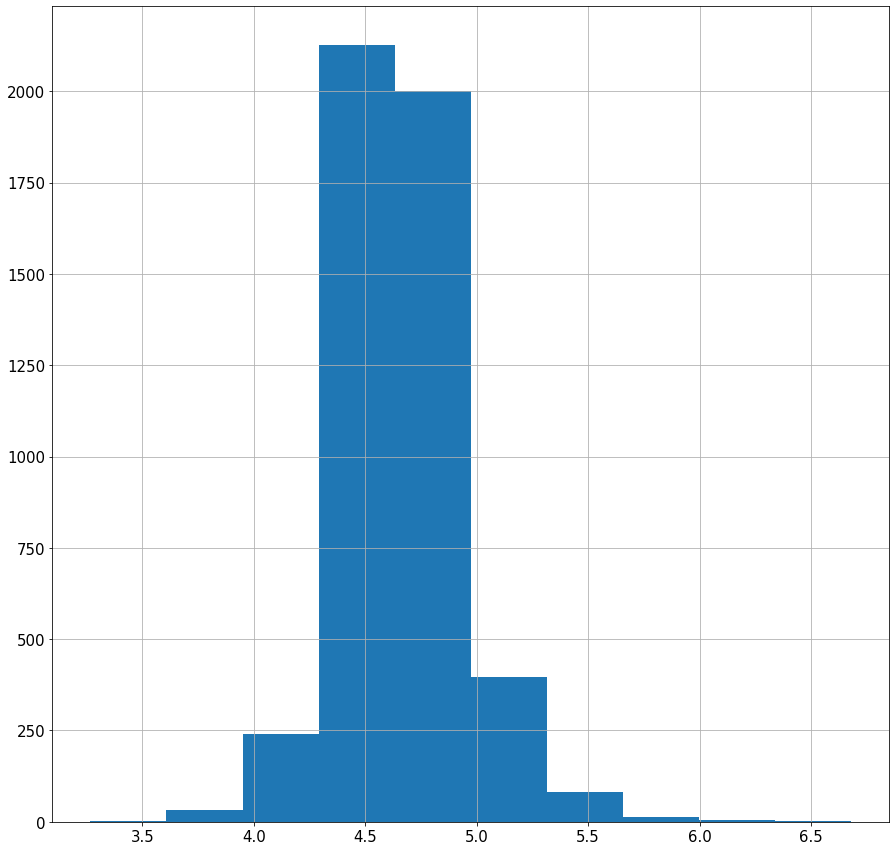

In [828]:
ll_series=pd.Series(ll_list,index=exp_data_row)
ll_series.apply(lambda x: np.log10(-x)).hist()

In [832]:
ll_series.iloc[marker_unique_exp_data_idx]

ENSG00000008311   -422113.873011
ENSG00000018625    -65571.711226
ENSG00000019549    -35778.017611
ENSG00000026025   -231161.871906
ENSG00000039068    -43050.835411
                       ...      
ENSG00000254277    -92480.358205
ENSG00000254339   -243572.620052
ENSG00000260342    -24240.556740
ENSG00000260834    -53094.941773
ENSG00000280623   -225487.408595
Length: 84, dtype: float64

In [833]:
ll_series

ENSG00000198804   -4.791515e+06
ENSG00000210082   -1.945687e+06
ENSG00000198712   -2.106622e+06
ENSG00000198938   -2.051493e+06
ENSG00000198727   -2.256569e+06
                       ...     
ENSG00000059573   -3.520070e+04
ENSG00000112640   -2.734437e+04
ENSG00000073711   -6.497622e+04
ENSG00000072134   -1.267286e+04
ENSG00000090061   -2.134934e+04
Length: 4898, dtype: float64

In [153]:
ll_series.apply(lambda x: np.log10(-x)).iloc[marker_unique_exp_data_idx].sort_values(ascending=False)

ENSG00000008311    5.625430
ENSG00000170542    5.515342
ENSG00000156966    5.505115
ENSG00000166450    5.457563
ENSG00000107984    5.449997
                     ...   
ENSG00000260342    4.384543
ENSG00000127863    4.325977
ENSG00000130203    4.270875
ENSG00000243004    4.193541
ENSG00000111816    3.877536
Length: 84, dtype: float64

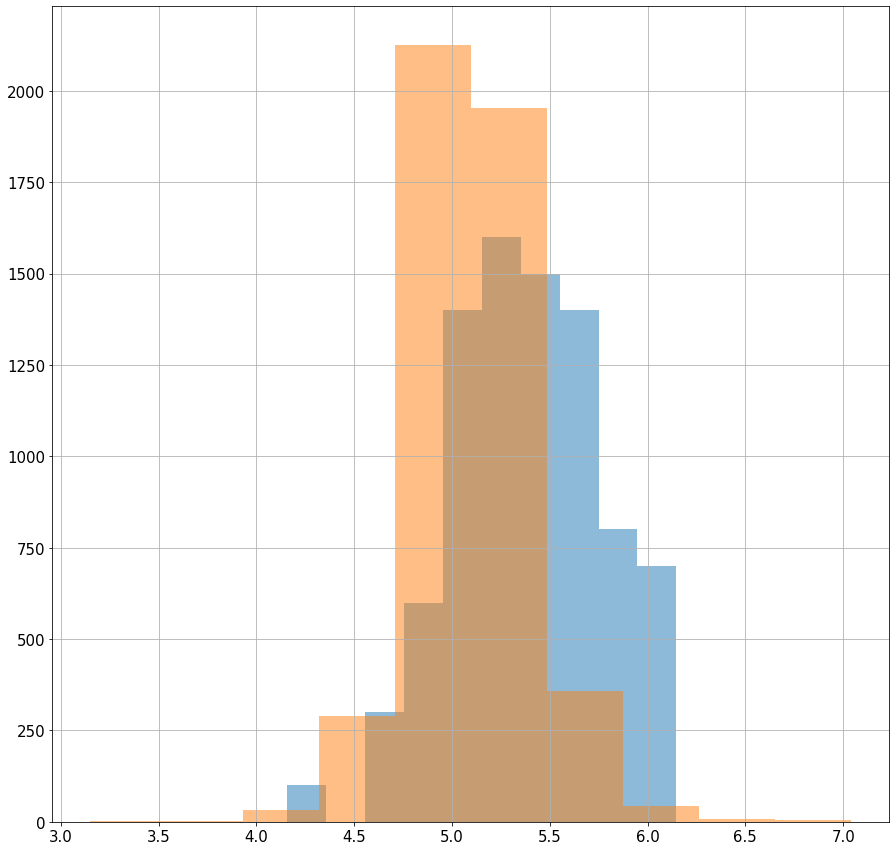

In [855]:

chisq_series=pd.Series(chisq_list,index=exp_data_row)
marker_unique_exp_data_idx_bool=np.array([i in marker_unique_exp_data_idx for i in range(exp_data.shape[0])])
chisq_series.apply(lambda x: np.log10(x)).iloc[marker_unique_exp_data_idx_bool].repeat(100).hist(alpha=0.5)
chisq_series.apply(lambda x: np.log10(x)).iloc[~marker_unique_exp_data_idx_bool].hist(alpha=0.5)

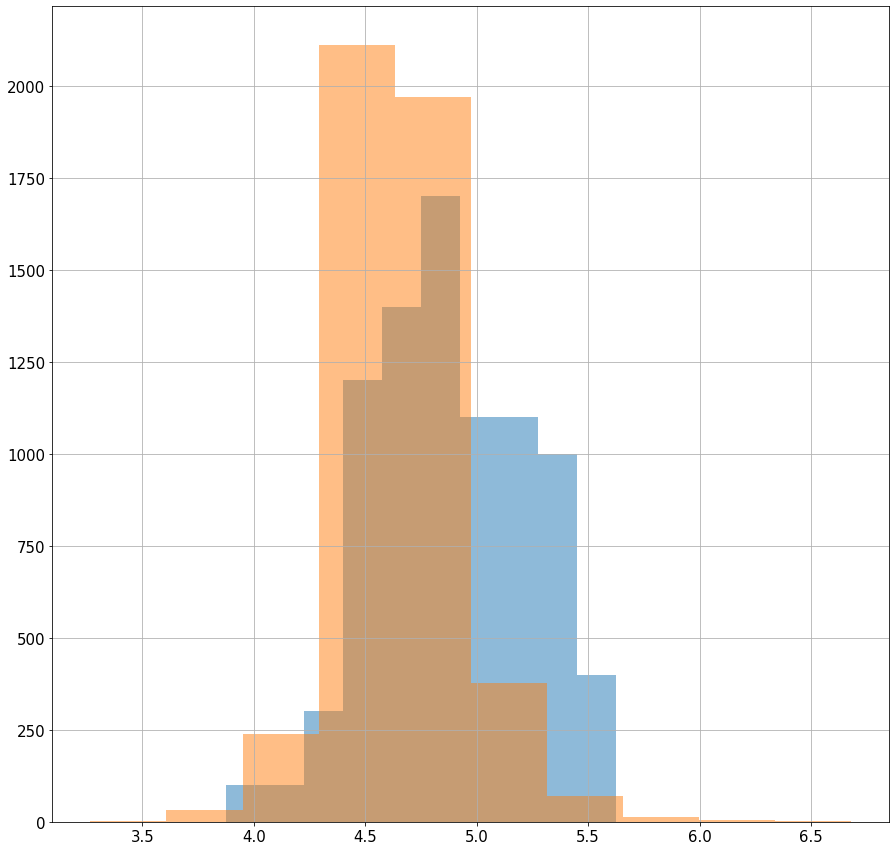

In [839]:
marker_unique_exp_data_idx_bool=np.array([i in marker_unique_exp_data_idx for i in range(exp_data.shape[0])])
ll_series.apply(lambda x: np.log10(-x)).iloc[marker_unique_exp_data_idx_bool].repeat(100).hist(alpha=0.5)
ll_series.apply(lambda x: np.log10(-x)).iloc[~marker_unique_exp_data_idx_bool].hist(alpha=0.5)

In [150]:
marker_unique_exp_data_idx

[378,
 3532,
 4391,
 493,
 3790,
 4870,
 2502,
 2573,
 2835,
 3735,
 1649,
 3503,
 3257,
 2120,
 1252,
 2810,
 2886,
 4103,
 2227,
 1964,
 4875,
 4795,
 4044,
 4540,
 1974,
 2764,
 1862,
 4433,
 4435,
 2426,
 3859,
 2680,
 4502,
 3906,
 4621,
 1171,
 3171,
 1266,
 1037,
 3691,
 1228,
 3961,
 2262,
 2105,
 1729,
 3423,
 4060,
 3970,
 2661,
 3651,
 3571,
 3008,
 3247,
 363,
 3326,
 2435,
 1836,
 1159,
 1019,
 1104,
 785,
 2742,
 1313,
 3873,
 3151,
 220,
 3834,
 2741,
 1366,
 1251,
 1867,
 2702,
 2873,
 4793,
 1550,
 3658,
 3821,
 2727,
 4369,
 4121,
 4361,
 2932,
 2505,
 2786]

In [149]:
model_result.llf,model_result.deviance,model_result.pearson_chi2

(-21349.344253337345, 40799.684922023094, 78817.8753268467)

In [114]:
device=device_cuda_list[3]#


model=Custom_Model_Trick(Y,rho.values,X_col=X.shape[1],delta_min=delta_min,LOWER_BOUND=LOWER_BOUND,THETA_LOWER_BOUND=THETA_LOWER_BOUND).to(device)
optimizer = optim.Adam(model.parameters(),lr=LR)#,betas=(0.92, 0.999))



cell_dataset=Cell_Dataset(Y,X,s)
cell_dataloader=DataLoader(dataset=cell_dataset,shuffle=False,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS)

In [116]:
0.001*LL_diff_tolerance

1.0000000000000001e-07

In [117]:

#model.delta_log.shape
#run_EM_trick(model,optimizer)

In [123]:
np.sum(np.argmax(gamma_new.cpu().numpy(),axis=1)==exp_data_meta_clusterid_clusteridunique)

438

In [119]:
=exp_data_meta_clusterid_clusteridunique

SyntaxError: invalid syntax (<ipython-input-119-e828e349323a>, line 1)